In [10]:
#by Willkie
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression


import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
#https://discord.com/channels/1134059900666916935/1283610000484208670

In [3]:
%run data_loading.ipynb

Data saved as data/output/1218.csv
Processed valid data saved as data/output/1218_processed.csv
Data saved as data/output/1213.csv
Processed valid data saved as data/output/1213_processed.csv
Data saved as data/output/1212.csv
Processed valid data saved as data/output/1212_processed.csv
Data saved as data/output/1211.csv
Processed valid data saved as data/output/1211_processed.csv
Data saved as data/output/1215.csv
Processed valid data saved as data/output/1215_processed.csv
Data saved as data/output/1214.csv
Processed valid data saved as data/output/1214_processed.csv
Data saved as data/output/1216.csv
Processed valid data saved as data/output/1216_processed.csv
Data saved as data/output/1217.csv
Processed valid data saved as data/output/1217_processed.csv
Combined raw data saved as 'data/output/df.csv'
Combined valid processed data saved as 'data/output/processed_df.csv'


In [5]:
df = pd.read_csv("data/output/df.csv")
df

,party_id,time,level,job,spec,map,date,valid,valid_spec,spec_by_level,avg_spec_by_level,spec_filled
0,1,오후 1:24,104.0,프리스트,NaN,물어전,2024-12-18,True,False,6.212909,6.212909,646.142571
1,2,오후 1:24,129.0,프리스트,NaN,검켄,2024-12-18,True,False,6.212909,6.212909,801.465304
2,3,오후 1:24,131.0,썬콜,NaN,망용둥,2024-12-18,True,False,NaN,NaN,NaN
3,4,오후 1:24,144.0,허밋,NaN,NaN,2024-12-18,False,False,18.275360,18.275360,2631.651779
4,5,오후 1:24,131.0,크루세이더,4200.0,NaN,2024-12-18,False,True,32.061069,33.070390,4200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2676,292,오후 1:59,143.0,용기사,5000.0,블와둥,2024-12-17,True,True,34.965035,35.282984,5000.000000
2677,297,오후 1:59,119.0,프리스트,NaN,검켄,2024-12-17,True,False,6.320755,6.320755,752.169811
2678,297,오후 1:59,134.0,프리스트,NaN,검켄,2024-12-17,True,False,6.320755,6.320755,846.981132
2679,300,오후 1:59,123.0,프리스트,NaN,NaN,2024-12-17,False,False,6.320755,6.320755,777.452830


In [6]:
processed_df = pd.read_csv("data/output/processed_df.csv")
processed_df

,party_id,time,level,job,spec,map,date,valid,valid_spec,spec_by_level,avg_spec_by_level,spec_filled
0,6,오후 1:24,145,허밋,2700,블와둥,2024-12-18,True,True,18.620690,18.275360,2700.0
1,24,오후 1:25,116,크루세이더,3900,깊바협,2024-12-18,True,True,33.620690,33.070390,3900.0
2,29,오후 1:26,147,용기사,5300,협동,2024-12-18,True,True,36.054422,35.416343,5300.0
3,37,오후 1:26,116,허밋,2100,망용둥,2024-12-18,True,True,18.103448,18.275360,2100.0
4,47,오후 1:27,145,프리스트,879,큰둥,2024-12-18,True,True,6.062069,6.212909,879.0
...,...,...,...,...,...,...,...,...,...,...,...,...
305,260,오후 1:57,106,나이트,3143,듀파,2024-12-17,True,True,29.650943,30.555809,3143.0
306,260,오후 1:57,89,나이트,2800,듀파,2024-12-17,True,True,31.460674,30.555809,2800.0
307,263,오후 1:57,106,프리스트,670,불어전,2024-12-17,True,True,6.320755,6.320755,670.0
308,263,오후 1:57,107,용기사,3400,불어전,2024-12-17,True,True,31.775701,35.282984,3400.0


In [7]:
hermit = processed_df[(processed_df['job'] == '허밋')]
hermit

,party_id,time,level,job,spec,map,date,valid,valid_spec,spec_by_level,avg_spec_by_level,spec_filled
0,6,오후 1:24,145,허밋,2700,블와둥,2024-12-18,True,True,18.620690,18.275360,2700.0
3,37,오후 1:26,116,허밋,2100,망용둥,2024-12-18,True,True,18.103448,18.275360,2100.0
6,59,오후 1:28,144,허밋,2500,망용둥,2024-12-18,True,True,17.361111,18.275360,2500.0
9,76,오후 1:29,109,허밋,1890,푸켄,2024-12-18,True,True,17.339450,18.275360,1890.0
10,77,오후 1:29,120,허밋,2150,망용둥,2024-12-18,True,True,17.916667,18.275360,2150.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289,161,오후 1:52,140,허밋,2700,협동,2024-12-17,True,True,19.285714,18.956725,2700.0
290,161,오후 1:52,133,허밋,2400,협동,2024-12-17,True,True,18.045113,18.956725,2400.0
293,163,오후 1:52,124,허밋,2500,협동,2024-12-17,True,True,20.161290,18.956725,2500.0
296,197,오후 1:54,124,허밋,2520,협동,2024-12-17,True,True,20.322581,18.956725,2520.0


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2681 entries, 0 to 2680
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   party_id           2681 non-null   int64  
 1   time               2681 non-null   object 
 2   level              2644 non-null   float64
 3   job                2681 non-null   object 
 4   spec               365 non-null    float64
 5   map                2376 non-null   object 
 6   date               2681 non-null   object 
 7   valid              2681 non-null   bool   
 8   valid_spec         2681 non-null   bool   
 9   spec_by_level      2520 non-null   float64
 10  avg_spec_by_level  2520 non-null   float64
 11  spec_filled        2487 non-null   float64
dtypes: bool(2), float64(5), int64(1), object(4)
memory usage: 214.8+ KB
None

Data Overview:
   party_id     time  level    job    spec  map        date  valid  \
0         1  오후 1:24  104.0   프리스트     NaN  물

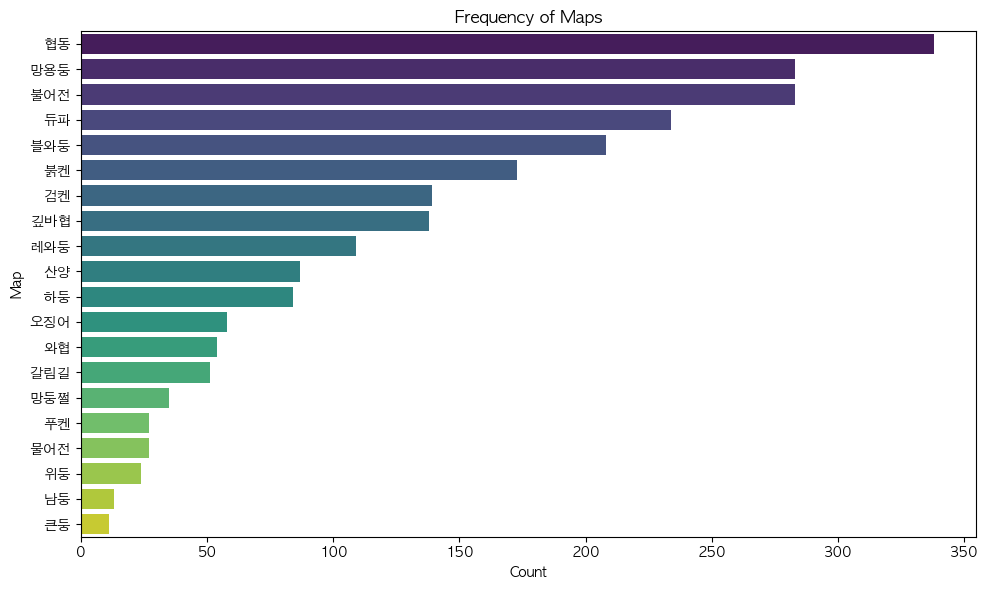

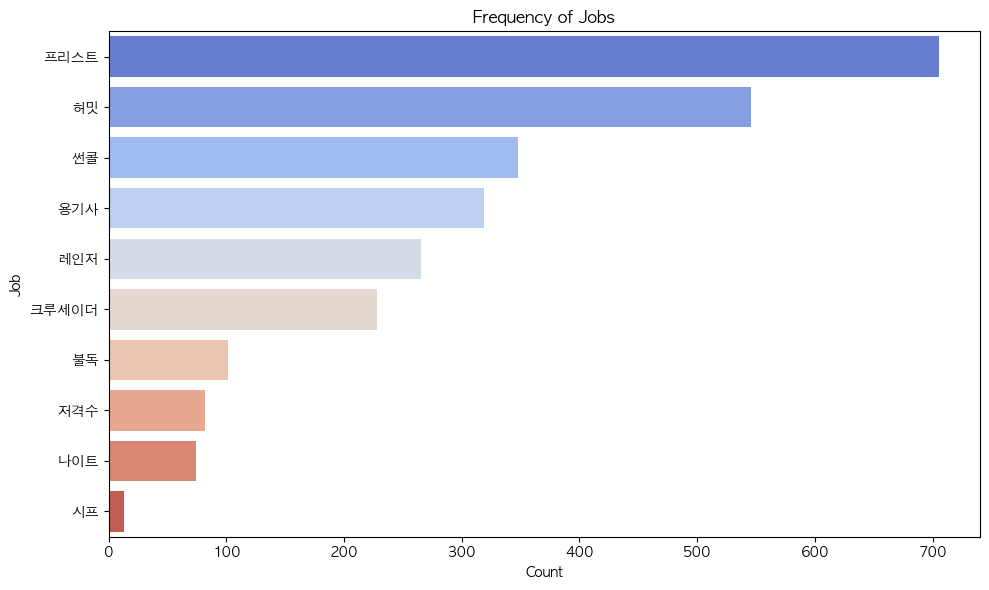

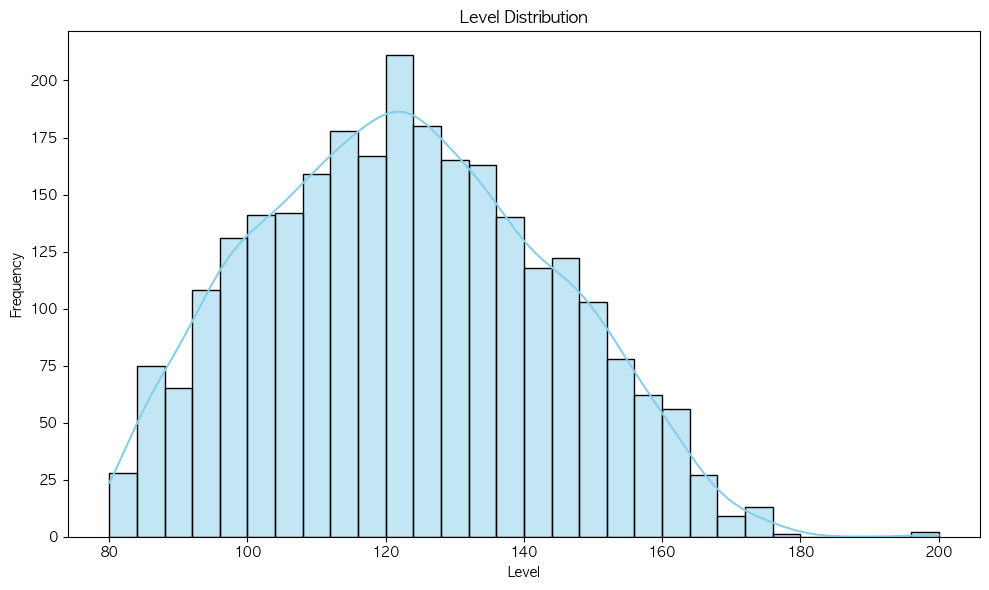

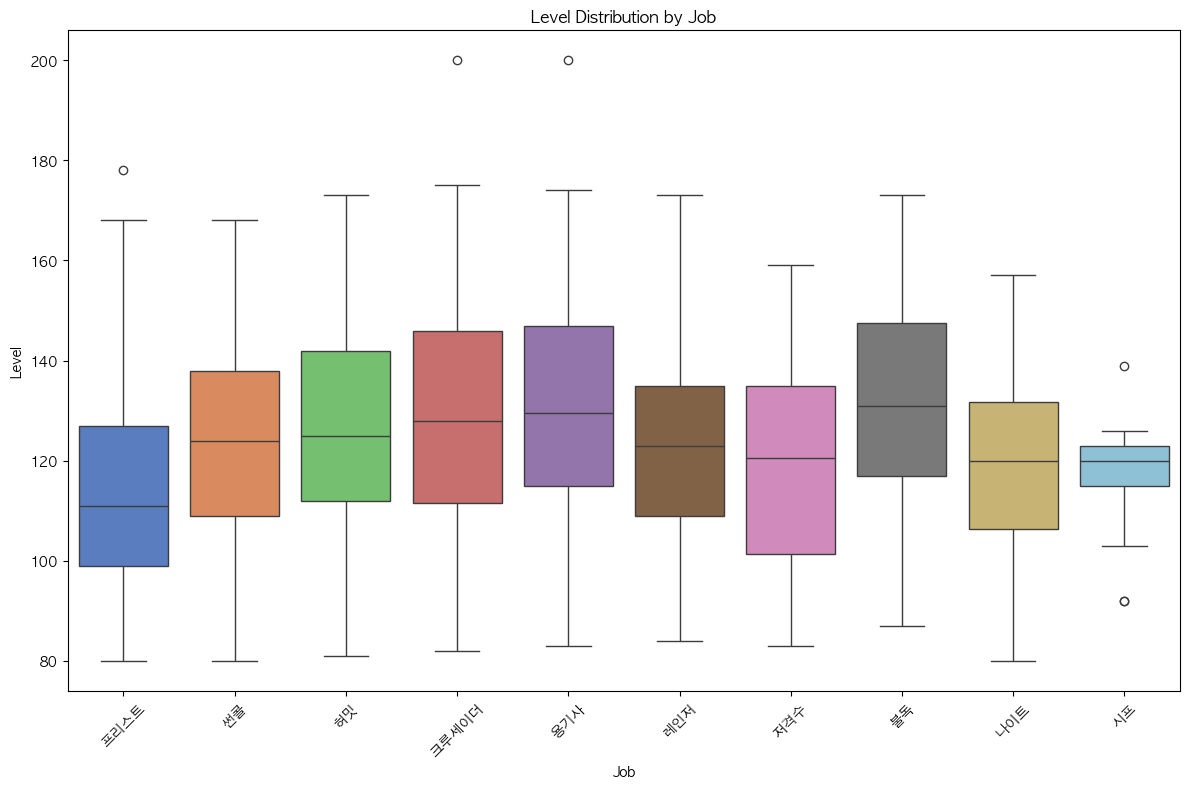

NameError: name 'average_spec_by_job' is not defined

NameError: name 'average_spec_by_job' is not defined

In [11]:
%run eda.ipynb

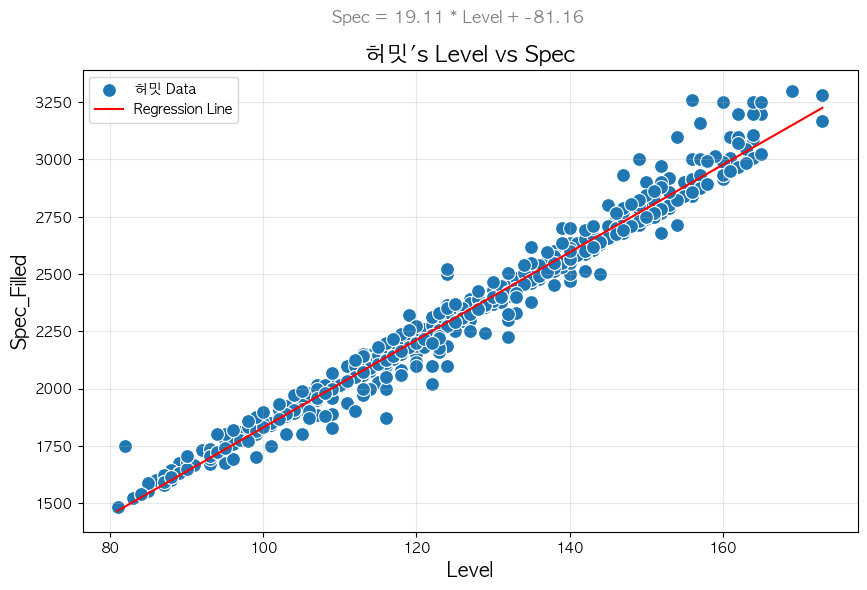

In [13]:
def plot_level_spec_with_regression(df, input_job, input_level=None):
    """
    Plots Level vs Spec for a specific job with a linear regression line and equation.
    Optionally marks a given level on the plot.

    Parameters:
    - df: DataFrame containing the data.
    - input_job: The specific job to filter and plot (e.g., '허밋').
    - input_level: Optional level to mark on the regression line.
    """
    # Filter for the specific job and drop rows with missing data
    job_df = df[df["job"] == input_job].dropna(subset=["level", "spec_filled"])
    
    # Check if there are enough data points for regression
    if len(job_df) < 2:
        print(f"Not enough data points to compute regression for job: {input_job}")
        return

    # Prepare data for linear regression
    X = job_df["level"].values.reshape(-1, 1)
    y = job_df["spec_filled"].values
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    coef = model.coef_[0]
    intercept = model.intercept_
    
    # Regression equation
    equation = f"Spec = {coef:.2f} * Level + {intercept:.2f}"
    
    # Plot Level vs Spec
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=job_df, x="level", y="spec_filled", s=100, label=f"{input_job} Data")
    sns.lineplot(x=job_df["level"], y=model.predict(X), color="red", label="Regression Line")
    
    # Mark the input level if provided
    if


In [448]:
def plot_level_spec_with_regression_by_level(df, input_job, level_input):
    """
    Plots Level vs Spec for a specific job and level range with a linear regression line and equation.

    Parameters:
    - df: DataFrame containing the data.
    - input_job: The specific job to filter and plot (e.g., '허밋').
    - level_input: The center level to filter by (e.g., 120).
    """
    # Filter data for the specific job and level range (±5)
    job_df = df[(df["job"] == input_job) & 
                (df["level"] >= level_input - 5) & 
                (df["level"] <= level_input + 5)].dropna(subset=["level", "spec"])

    # Check if there are enough data points for regression
    if len(job_df) < 2:
        print(f"Not enough data points to compute regression for job: {input_job} and level {level_input}")
        return

    # Prepare data for linear regression
    X = job_df["level"].values.reshape(-1, 1)
    y = job_df["spec"].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    coef = model.coef_[0]
    intercept = model.intercept_

    # Regression equation
    equation = f"Spec = {coef:.2f} * Level + {intercept:.2f}"

    # Plot Level vs Spec
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=job_df, x="level", y="spec", s=100, label=f"{input_job} Data")
    sns.lineplot(x=job_df["level"], y=model.predict(X), color="red", label="Regression Line")
    plt.title(f"{input_job}'s Level vs Spec (Level {level_input} ± 5)", fontsize=16)
    plt.suptitle(equation, fontsize=12, color="gray")
    plt.xlabel("Level", fontsize=14)
    plt.ylabel("Spec", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [449]:
def plot_level_by_map_by_job(df, job):
    """
    Plots the level distribution by map for a specific job, limiting to maps with 5% or higher usage.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        job (str): The job to filter the data for.
    """
    # Filter data for the specified job
    job_df = df[df["job"] == job]

    # Calculate map usage percentages
    map_counts = job_df["map"].value_counts(normalize=True)  # Normalize=True gives percentages
    valid_maps = map_counts[map_counts >= 0.05].index  # Keep maps with 5% or more usage

    # Filter job_df to include only valid maps
    filtered_job_df = job_df[job_df["map"].isin(valid_maps)]

    if filtered_job_df.empty:
        print(f"No maps with >=5% usage for job: {job}")
        return

    # Plot the boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=filtered_job_df, x="map", y="level", palette="Set2")
    plt.title(f"{job} 레벨별 맵 (5% 이상 사용된 맵)")
    plt.xlabel("Map")
    plt.ylabel("Level")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [450]:
def visualize_spec_validity_by_map(df, input_job='all'):
    """
    Visualizes the validity of the data by map using stacked bars.
    Filters data for a specific job if provided.

    Parameters:
        df (pd.DataFrame): The dataset containing 'map' and 'valid_spec' columns.
        input_job (str): The job to filter data by. Use 'all' to include all jobs.
    """
    # Filter for a specific job if provided
    if input_job.lower() != 'all':
        df = df[df['job'] == input_job]
        if df.empty:
            print(f"No data available for job '{input_job}'.")
            return

    # Count valid and invalid entries for each map
    spec_validity_by_map = df.groupby(['map', 'valid_spec']).size().unstack(fill_value=0)

    # Reset index for plotting
    spec_validity_by_map = spec_validity_by_map.reset_index()

    # Set up figure
    plt.figure(figsize=(12, 7))

    # Plot stacked bars
    plt.bar(spec_validity_by_map['map'], spec_validity_by_map[0], label='미기재', color='#FF6F61')
    plt.bar(spec_validity_by_map['map'], spec_validity_by_map[1], bottom=spec_validity_by_map[0], label='기재', color='#6B8E23')

    # Customize plot
    title = f"맵별 스공기재여부 ({input_job})" if input_job.lower() != 'all' else "맵별 스공기재여부"
    plt.title(title, fontsize=16)
    plt.xlabel('Map', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title='스공기재여부', fontsize=12)
    plt.tight_layout()
    plt.show()


def visualize_spec_validity_by_job(df, input_job='all'):
    """
    Visualizes the validity of the data by job using stacked bars.
    Filters data for a specific job if provided.

    Parameters:
        df (pd.DataFrame): The dataset containing 'job' and 'valid_spec' columns.
        input_job (str): The job to filter data by. Use 'all' to include all jobs.
    """
    # Filter for a specific job if provided
    if input_job.lower() != 'all':
        df = df[df['job'] == input_job]
        if df.empty:
            print(f"No data available for job '{input_job}'.")
            return

    # Count valid and invalid entries for each job
    validity_by_job = df.groupby(['job', 'valid_spec']).size().unstack(fill_value=0)

    # Reset index for plotting
    validity_by_job = validity_by_job.reset_index()

    # Set up figure
    plt.figure(figsize=(12, 7))

    # Plot stacked bars
    plt.bar(validity_by_job['job'], validity_by_job[0], label='미기재', color='#FF6F61')
    plt.bar(validity_by_job['job'], validity_by_job[1], bottom=validity_by_job[0], label='기재', color='#6B8E23')

    # Customize plot
    title = f"스공기재여부 ({input_job})" if input_job.lower() != 'all' else "직업별 스공기재여부"
    plt.title(title, fontsize=16)
    plt.xlabel('Job', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title='스공기재여부', fontsize=12)
    plt.tight_layout()
    plt.show()



def visualize_spec_validity_by_job(df):
    """
    Visualizes the validity of the data by job using stacked bars.
    """
    # Count valid and invalid entries for each job
    validity_by_job = df.groupby(['job', 'valid_spec']).size().unstack(fill_value=0)

    # Reset index for plotting
    validity_by_job = validity_by_job.reset_index()

    # Set up figure
    plt.figure(figsize=(12, 7))

    # Plot stacked bars
    plt.bar(validity_by_job['job'], validity_by_job[0], label='미기재', color='#FF6F61')
    plt.bar(validity_by_job['job'], validity_by_job[1], bottom=validity_by_job[0], label='기재', color='#6B8E23')

    # Customize plot
    plt.title('직업별 스공기재여부', fontsize=16)
    plt.xlabel('Job', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title='스공기재여부', fontsize=12)
    plt.tight_layout()
    plt.show()

In [451]:
def visualize_map_distribution_by_date(df):
    """
    Visualizes map distribution by date as a stacked bar chart with diverse colors.
    """
    # Count occurrences of maps by date
    map_counts = df.groupby(['date', 'map']).size().unstack(fill_value=0)

    # Generate a colormap with as many distinct colors as maps
    num_maps = map_counts.shape[1]
    colormap = cm.get_cmap('tab20', num_maps)  # Use 'tab20' or any other diverse colormap
    colors = [mcolors.to_hex(colormap(i)) for i in range(num_maps)]

    # Plot stacked bar chart
    map_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
    plt.title('Map Distribution by Date', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title='Map', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [452]:
def visualize_level_spec_comparison(df, jobs):
    """
    Visualizes the relationship between level and spec for selected jobs.

    Parameters:
    - df: DataFrame containing the data.
    - jobs: List of jobs to include in the comparison.
    """
    # Filter data for the selected jobs
    job_data = df[df['job'].isin(jobs)].copy()

    # Ensure level and spec are numeric
    job_data['level'] = pd.to_numeric(job_data['level'], errors='coerce')
    job_data['spec'] = pd.to_numeric(job_data['spec'], errors='coerce')

    # Drop rows with missing or invalid level/spec values
    job_data = job_data.dropna(subset=['level', 'spec'])

    # Dynamically generate colors for the jobs
    color_palette = sns.color_palette("husl", len(jobs))
    colors = {job: color for job, color in zip(jobs, color_palette)}

    plt.figure(figsize=(12, 8))

    # Scatter plot with hue for different jobs
    sns.scatterplot(data=job_data, x='level', y='spec', hue='job', style='job', s=100, alpha=0.6, palette=colors)

    # Add regression lines for each job
    for job in jobs:
        job_specific_data = job_data[job_data['job'] == job]
        if not job_specific_data.empty:
            x = job_specific_data['level'].values.reshape(-1, 1)
            y = job_specific_data['spec'].values
            if len(x) > 1:  # Ensure there are enough points for regression
                model = LinearRegression()
                model.fit(x, y)
                coef = model.coef_[0]
                intercept = model.intercept_
                sns.lineplot(x=job_specific_data['level'], y=model.predict(x), color=colors[job], label=f'{job} Trend')
                # Add regression equation as text
                plt.text(
                    0.05, 0.9 - jobs.index(job) * 0.1,
                    f'{job}: Spec = {coef:.2f} * Level + {intercept:.2f}',
                    transform=plt.gca().transAxes,
                    fontsize=12,
                    bbox=dict(facecolor='white', alpha=0.7)
                )

    # Customize plot appearance
    plt.title('Level vs. Spec Comparison for Selected Jobs', fontsize=16)
    plt.xlabel('Level', fontsize=14)
    plt.ylabel('Spec', fontsize=14)
    plt.legend(title='Job', fontsize=12, loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [453]:
def plot_level_spec_with_regression_by_level(df, input_job, level_input):
    """
    Plots Level vs Spec for a specific job and level range with a linear regression line and equation.

    Parameters:
    - df: DataFrame containing the data.
    - input_job: The specific job to filter and plot (e.g., '허밋').
    - level_input: The center level to filter by (e.g., 120).
    """
    # Filter data for the specific job and level range (±5)
    job_df = df[(df["job"] == input_job) & 
                (df["level"] >= level_input - 5) & 
                (df["level"] <= level_input + 5)].dropna(subset=["level", "spec"])

    # Check if there are enough data points for regression
    if len(job_df) < 2:
        print(f"Not enough data points to compute regression for job: {input_job} and level {level_input}")
        return

    # Prepare data for linear regression
    X = job_df["level"].values.reshape(-1, 1)
    y = job_df["spec"].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    coef = model.coef_[0]
    intercept = model.intercept_

    # Regression equation
    equation = f"Spec = {coef:.2f} * Level + {intercept:.2f}"

    # Plot Level vs Spec
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=job_df, x="level", y="spec", s=100, label=f"{input_job} Data")
    sns.lineplot(x=job_df["level"], y=model.predict(X), color="red", label="Regression Line")
    plt.title(f"{input_job}'s Level vs Spec (Level {level_input} ± 5)", fontsize=16)
    plt.suptitle(equation, fontsize=12, color="gray")
    plt.xlabel("Level", fontsize=14)
    plt.ylabel("Spec", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [454]:
def plot_combined_scatter_with_regression(df, level_threshold):
    """
    Filters data by level threshold and plots a scatterplot for map, level, and spec
    with regression lines per job and map as the marker style.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        level_threshold (int): The minimum level to filter by.
    """
    # Filter the DataFrame
    filtered_df = df[df["level"] >= level_threshold]

    if filtered_df.empty:
        print(f"No data found with level >= {level_threshold}")
        return

    # Ensure level and spec are numeric
    filtered_df["level"] = pd.to_numeric(filtered_df["level"], errors="coerce")
    filtered_df["spec"] = pd.to_numeric(filtered_df["spec"], errors="coerce")

    # Drop rows with missing or invalid level/spec values
    filtered_df = filtered_df.dropna(subset=["level", "spec"])

    # Plot scatterplot
    plt.figure(figsize=(14, 10))
    scatter = sns.scatterplot(
        data=filtered_df,
        x="level",
        y="spec",
        hue="job",
        style="map",  # Different marker styles for maps
        palette="husl",
        s=100,
        alpha=0.6,
        edgecolor="w"
    )

    unique_jobs = filtered_df["job"].unique()
    for job in unique_jobs:
        job_data = filtered_df[filtered_df["job"] == job]
        x = job_data["level"].values.reshape(-1, 1)
        y = job_data["spec"].values

        if len(x) > 1:  # Ensure sufficient data points for regression
            model = LinearRegression()
            model.fit(x, y)
            coef = model.coef_[0]
            intercept = model.intercept_
            sns.lineplot(
                x=x.flatten(),
                y=model.predict(x),
                label=f"{job} Trend (y={coef:.2f}x+{intercept:.2f})",
                color=scatter.legend_.get_texts()[list(unique_jobs).index(job)].get_color(),
                linewidth=2
            )

    # Customize plot appearance
    plt.title(f"Combined Scatter and Regression (Level >= {level_threshold})", fontsize=16)
    plt.xlabel("Level", fontsize=14)
    plt.ylabel("Spec", fontsize=14)
    plt.legend(title="Job and Map", fontsize=12, loc="upper left", bbox_to_anchor=(1.05, 1))
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [455]:
def visualize_map_percentage_change(df, map_name):
    """
    Visualizes the percentage change of a specific map's distribution over time.
    
    Parameters:
    - df: DataFrame containing the data.
    - map_name: The name of the map to analyze.
    """
    # Count occurrences of maps by date
    map_counts = df.groupby(['date', 'map']).size().unstack(fill_value=0)

    # Calculate the percentage contribution of each map per date
    map_percentage = map_counts.div(map_counts.sum(axis=1), axis=0) * 100

    # Extract the percentage values for the specific map
    if map_name not in map_percentage.columns:
        print(f"Map '{map_name}' not found in the data.")
        return
    
    map_data = map_percentage[map_name]

    # Plot the percentage change over time
    plt.figure(figsize=(10, 6))
    map_data.plot(kind='line', marker='o', label=f"{map_name} Distribution %")
    plt.title(f"Percentage Change in {map_name} Distribution Over Time", fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

In [456]:
def plot_scatter_by_job(df, job, level_threshold):
    # Filter the DataFrame
    filtered_df = df[(df["job"] == job) & (df["level"] >= level_threshold)]

    if filtered_df.empty:
        print(f"No data found for job '{job}' with level >= {level_threshold}")
        return

    # Ensure level and spec are numeric
    filtered_df["level"] = pd.to_numeric(filtered_df["level"], errors="coerce")
    filtered_df["spec"] = pd.to_numeric(filtered_df["spec"], errors="coerce")

    # Drop rows with missing or invalid level/spec values
    filtered_df = filtered_df.dropna(subset=["level", "spec"])

    plt.figure(figsize=(12, 8))

    # Scatter plot with color as map
    scatter = sns.scatterplot(
        data=filtered_df,
        x="level",
        y="spec",
        hue="map",
        palette="husl",
        s=100,
        alpha=0.6,
        edgecolor="w"
    )

    x = filtered_df["level"].values.reshape(-1, 1)
    y = filtered_df["spec"].values
    if len(x) > 1:  # Ensure sufficient data points for regression
        model = LinearRegression()
        model.fit(x, y)
        coef = model.coef_[0]
        intercept = model.intercept_
        equation = f"y = {coef:.2f}x + {intercept:.2f}"
        sns.lineplot(
            x=x.flatten(),
            y=model.predict(x),
            color="black",
            label=f"Regression Line: {equation}",
            linewidth=2
        )
        plt.text(
            0.05, 0.95, equation,
            transform=plt.gca().transAxes,
            fontsize=12,
            bbox=dict(facecolor='white', alpha=0.6)
        )

    # Customize plot appearance
    plt.title(f"Scatter Plot for {job} (Level >= {level_threshold})", fontsize=16)
    plt.xlabel("Level", fontsize=14)
    plt.ylabel("Spec", fontsize=14)
    plt.legend(title="Map", fontsize=12, loc="upper left", bbox_to_anchor=(1.05, 1))
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [457]:
def plot_level_spec_distribution_of_job_and_map(df, map_name, job_name):
    """
    Visualizes the distribution of level and spec for a specific map and job.

    Parameters:
        df (pd.DataFrame): The dataset containing the data.
        map_name (str): The map to filter by.
        job_name (str): The job to filter by.
    """
    # 필터링: 선택된 맵과 직업에 해당하는 데이터만 가져오기
    filtered_df = df[(df['map'] == map_name) & (df['job'] == job_name)]

    if filtered_df.empty:
        print(f"No data found for map '{map_name}' and job '{job_name}'.")
        return

    # 레벨과 스펙을 숫자로 변환 (필요한 경우)
    filtered_df['level'] = pd.to_numeric(filtered_df['level'], errors='coerce')
    filtered_df['spec'] = pd.to_numeric(filtered_df['spec'], errors='coerce')

    # 유효한 데이터만 사용
    filtered_df = filtered_df.dropna(subset=['level', 'spec'])

    # 시각화
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=filtered_df,
        x='level',
        y='spec',
        s=100,
        alpha=0.6,
        edgecolor='w',
        color='blue'
    )
    
    # 레벨 및 스펙의 밀도 분포를 추가
    sns.kdeplot(
        data=filtered_df,
        x='level',
        y='spec',
        cmap='Blues',
        fill=True,
        alpha=0.5
    )

    # 그래프 제목과 레이블 설정
    plt.title(f"Level and Spec Distribution for {job_name} on {map_name}", fontsize=16)
    plt.xlabel("Level", fontsize=14)
    plt.ylabel("Spec", fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # 그래프 표시
    plt.show()


In [487]:
def plot_level_spec_filled_distribution_of_job_and_map(df, map_name, job_name):
    # 필터링: 선택된 맵과 직업에 해당하는 데이터만 가져오기
    filtered_df = df[(df['map'] == map_name) & (df['job'] == job_name)]

    if filtered_df.empty:
        print(f"No data found for map '{map_name}' and job '{job_name}'.")
        return

    # 레벨과 스펙을 숫자로 변환 (필요한 경우)
    filtered_df['level'] = pd.to_numeric(filtered_df['level'], errors='coerce')
    filtered_df['spec_filled'] = pd.to_numeric(filtered_df['spec_filled'], errors='coerce')

    # 유효한 데이터만 사용
    filtered_df = filtered_df.dropna(subset=['level', 'spec_filled'])

    # 시각화
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=filtered_df,
        x='level',
        y='spec_filled',
        s=100,
        alpha=0.6,
        edgecolor='w',
        color='blue'
    )
    
    # 레벨 및 스펙의 밀도 분포를 추가
    sns.kdeplot(
        data=filtered_df,
        x='level',
        y='spec_filled',
        cmap='Blues',
        fill=True,
        alpha=0.5
    )

    # 그래프 제목과 레이블 설정
    plt.title(f"Level and Spec_Filled Distribution for {job_name} on {map_name}", fontsize=16)
    plt.xlabel("Level", fontsize=14)
    plt.ylabel("Spec_Filled", fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # 그래프 표시
    plt.show()


In [458]:
def plot_level_spec_distribution_of_job(df, job_name):
    """
    Visualizes the distribution of level and spec for a specific job across maps with 5%+ usage,
    with individual regression lines for each map, ensuring colors match.

    Parameters:
        df (pd.DataFrame): The dataset containing the data.
        job_name (str): The job to filter by.
    """
    # Filter data for the selected job
    filtered_df = df[df['job'] == job_name]

    if filtered_df.empty:
        print(f"No data found for job '{job_name}'.")
        return

    # Convert level and spec to numeric
    filtered_df['level'] = pd.to_numeric(filtered_df['level'], errors='coerce')
    filtered_df['spec'] = pd.to_numeric(filtered_df['spec'], errors='coerce')

    # Drop rows with missing or invalid level/spec values
    filtered_df = filtered_df.dropna(subset=['level', 'spec'])

    # Calculate map usage percentages and filter maps with >= 5% usage
    map_counts = filtered_df['map'].value_counts(normalize=True)
    valid_maps = map_counts[map_counts >= 0.05].index
    filtered_df = filtered_df[filtered_df['map'].isin(valid_maps)]

    if filtered_df.empty:
        print(f"No maps with >=5% usage for job '{job_name}'.")
        return

    # Extract unique maps and generate a color palette
    unique_maps = filtered_df['map'].unique()
    map_palette = sns.color_palette("husl", len(unique_maps))
    map_colors = dict(zip(unique_maps, map_palette))  # Map names to colors

    # Plot settings
    plt.figure(figsize=(14, 10))

    # Plot scatter and regression lines for each valid map
    for map_name, color in map_colors.items():
        map_data = filtered_df[filtered_df['map'] == map_name]
        
        # Scatter plot
        sns.scatterplot(
            data=map_data,
            x="level",
            y="spec",
            color=color,
            label=map_name,
            s=100,
            alpha=0.7,
            edgecolor="w"
        )

        # Regression line (only if sufficient data points exist)
        if len(map_data) > 1:
            x = map_data['level'].values.reshape(-1, 1)
            y = map_data['spec'].values

            # Fit linear regression model
            model = LinearRegression()
            model.fit(x, y)
            y_pred = model.predict(x)

            # Add regression line
            plt.plot(
                x,
                y_pred,
                color=color,
                linestyle='--',
                label=f"{map_name} Trend (y={model.coef_[0]:.2f}x + {model.intercept_:.2f})"
            )

    # Add labels and title
    plt.title(f"Level and Spec Distribution with Map Regression for {job_name} (5%+ Maps)", fontsize=16)
    plt.xlabel("Level", fontsize=14)
    plt.ylabel("Spec", fontsize=14)
    plt.legend(title="Map & Regression", fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [459]:
def plot_map_level_heatmap_for_job(df, input_job):
    """
    Plots a heatmap for a specific job showing the distribution of maps and levels,
    limited to maps with 5% or higher usage.

    Parameters:
        df (pd.DataFrame): The dataset containing 'map', 'level', and 'job' columns.
        input_job (str): The specific job to filter and plot.
    """
    # Filter data for the selected job
    filtered_df = df[df["job"] == input_job]

    if filtered_df.empty:
        print(f"No data found for job '{input_job}'.")
        return

    # Calculate total counts for all maps
    map_usage = filtered_df["map"].value_counts(normalize=True)  # Normalized usage (percentage)
    
    # Keep only maps with 5% or higher usage
    valid_maps = map_usage[map_usage >= 0.05].index
    filtered_df = filtered_df[filtered_df["map"].isin(valid_maps)]

    # If no maps meet the threshold
    if filtered_df.empty:
        print(f"No maps with >= 5% usage for job '{input_job}'.")
        return

    # Group data by 'map' and 'level', and count occurrences
    map_level_counts = filtered_df.groupby(["map", "level"]).size().reset_index(name="count")
    
    # Pivot the table to have maps as rows and levels as columns
    map_level_pivot = map_level_counts.pivot(index="map", columns="level", values="count").fillna(0)

    # Plot the heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        map_level_pivot, 
        annot=True, 
        fmt=".0f", 
        cmap="YlGnBu", 
        cbar_kws={'label': 'Frequency'}
    )
    plt.title(f"Map-Level Distribution for {input_job} (Maps ≥ 5% Usage)", fontsize=16)
    plt.xlabel("Level", fontsize=14)
    plt.ylabel("Map", fontsize=14)
    plt.tight_layout()
    plt.show()


In [460]:
def plot_level_distribution_by_job_and_map(df, input_job):
    # Filter data for the input job
    filtered_df = df[df["job"] == input_job]

    if filtered_df.empty:
        print(f"No data found for job '{input_job}'.")
        return

    # Calculate map usage percentages
    map_counts = filtered_df["map"].value_counts(normalize=True) * 100
    maps_to_include = map_counts[map_counts >= 5].index  # Maps with 5% or more usage

    # Filter data for maps meeting the threshold
    filtered_df = filtered_df[filtered_df["map"].isin(maps_to_include)]

    if filtered_df.empty:
        print(f"No maps with >=5% usage found for job '{input_job}'.")
        return

    # Plot trendy violin plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(
        data=filtered_df,
        x="map",
        y="level",
        palette="husl",
        scale="width",
        inner="quartile"
    )

    # Add titles and labels
    plt.title(f"Level Distribution for '{input_job}' (Maps with ≥5% Usage)", fontsize=16)
    plt.xlabel("Map", fontsize=14)
    plt.ylabel("Level", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()

In [477]:
def plot_map_frequency_by_level_range(df, job_name):
    """
    Creates a heatmap showing map usage frequency for a specific job across level ranges.
    """
    # Filter for the selected job
    job_df = df[df['job'] == job_name]
    job_df['level_bin'] = pd.cut(job_df['level'], bins=range(80, 201, 10), right=False)

    # Count maps per level range
    map_frequency = pd.crosstab(job_df['level_bin'], job_df['map'])

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(map_frequency, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.title(f"Map Frequency by Level Range for {job_name}")
    plt.xlabel("Map")
    plt.ylabel("Level Range")
    plt.tight_layout()
    plt.show()

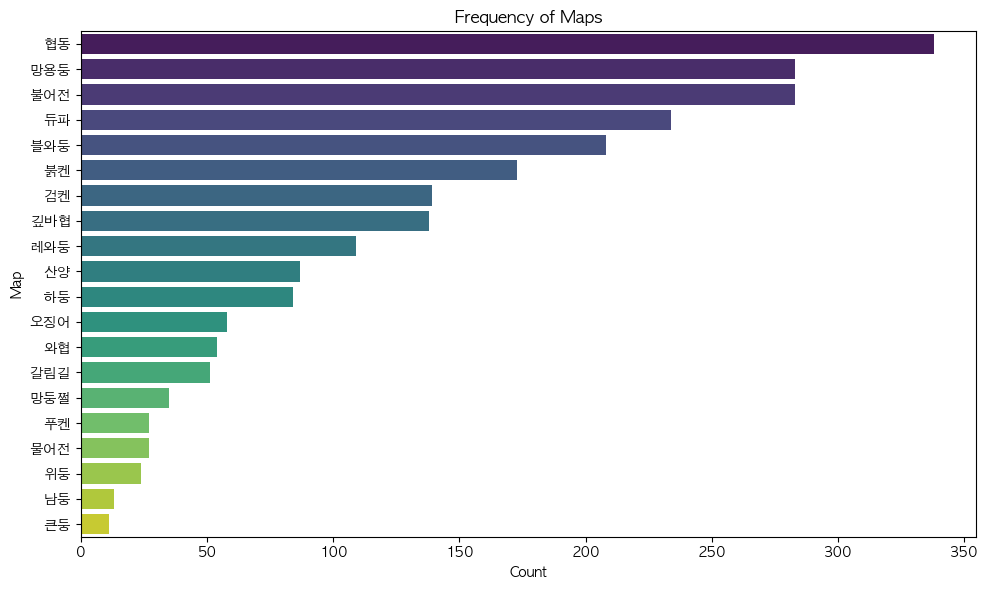

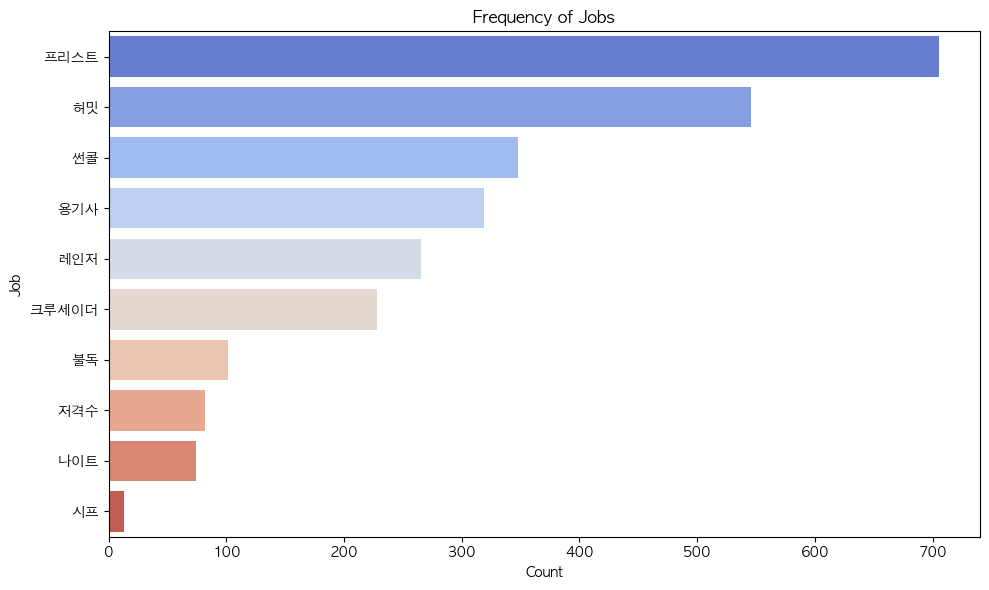

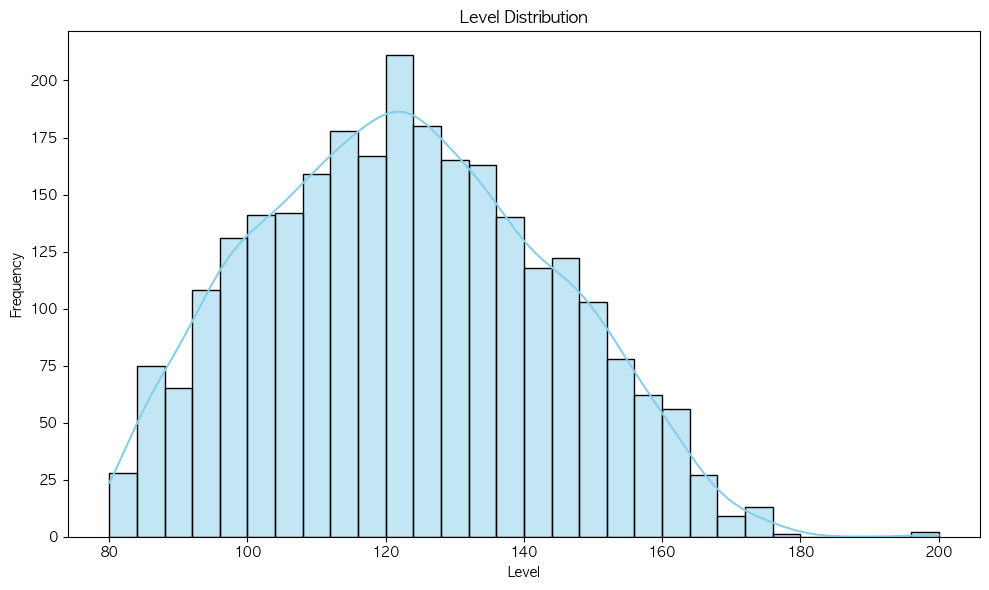

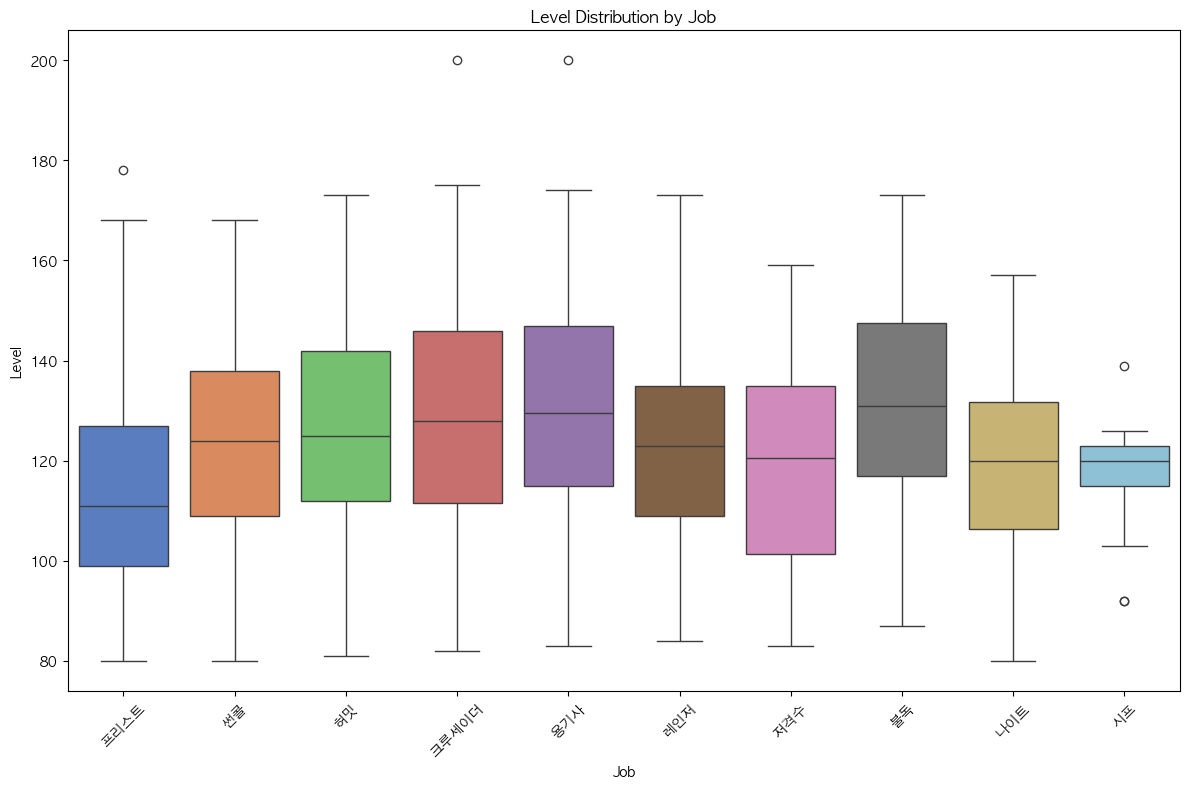

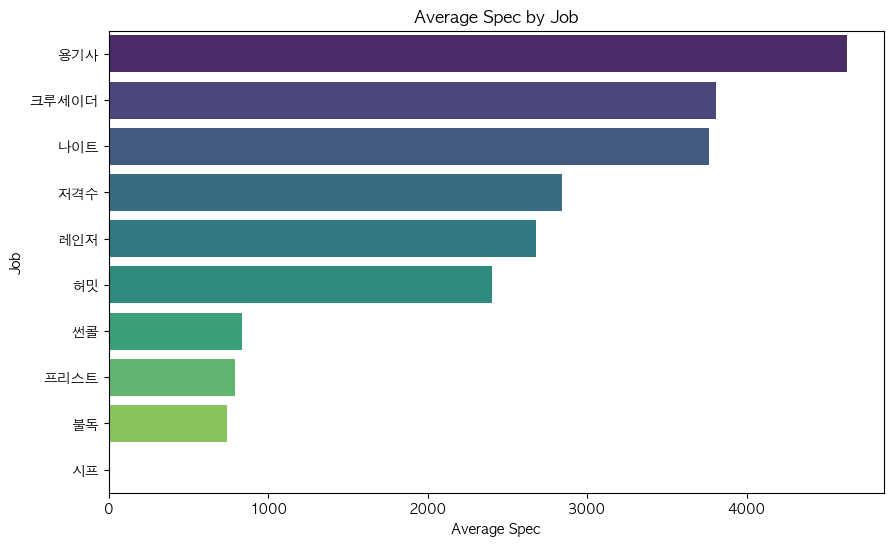

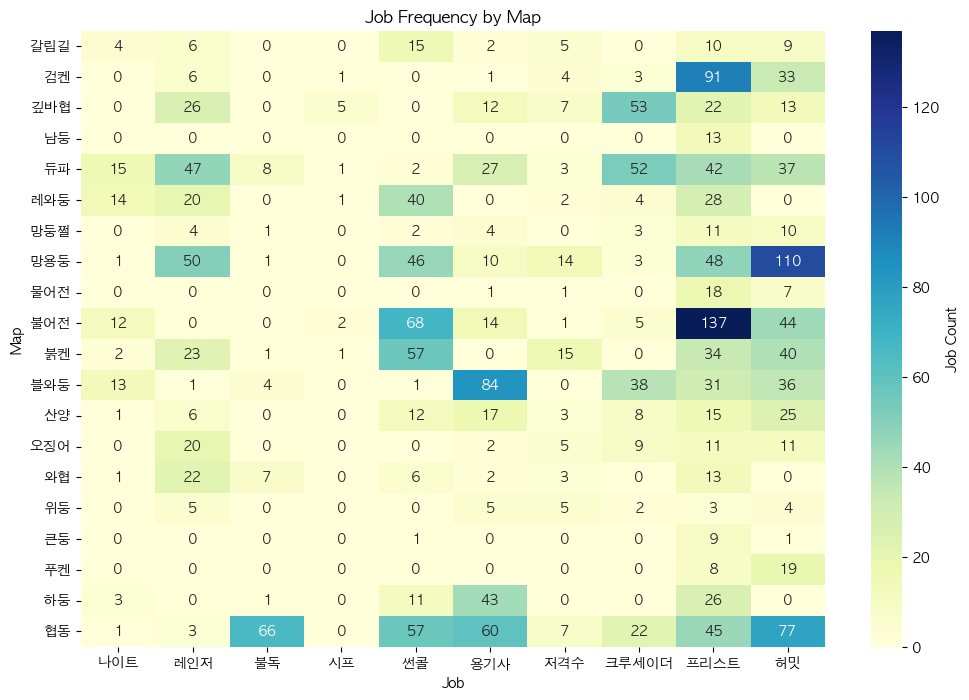

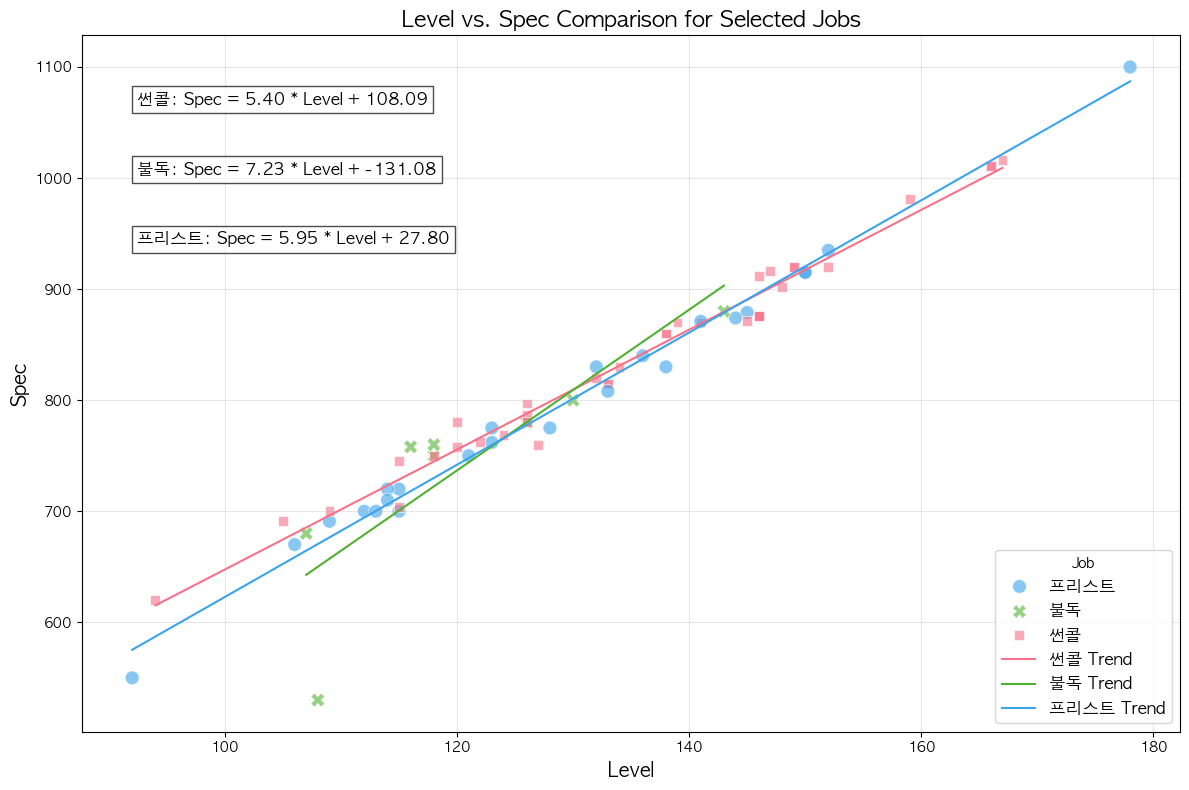

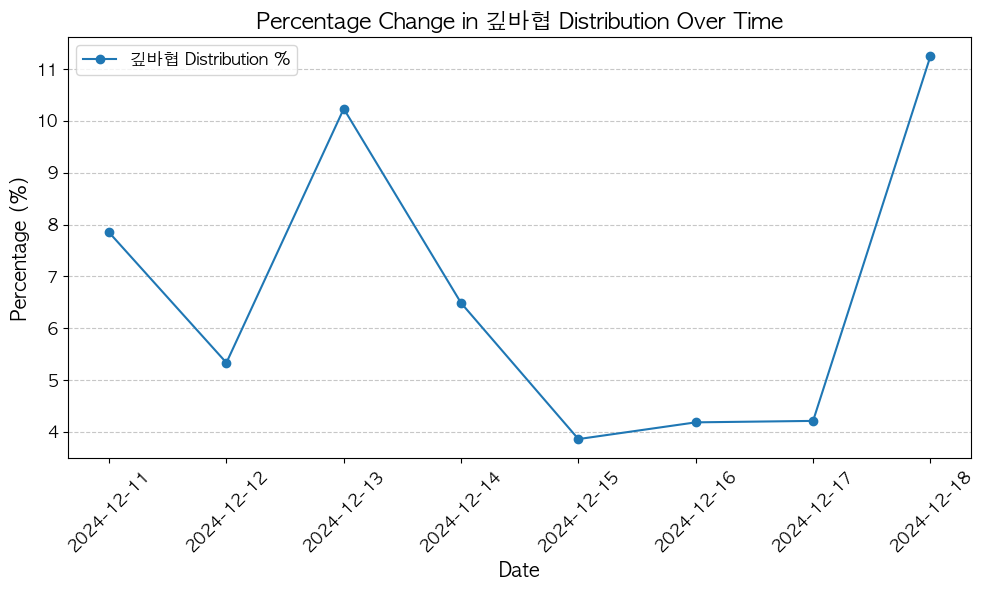

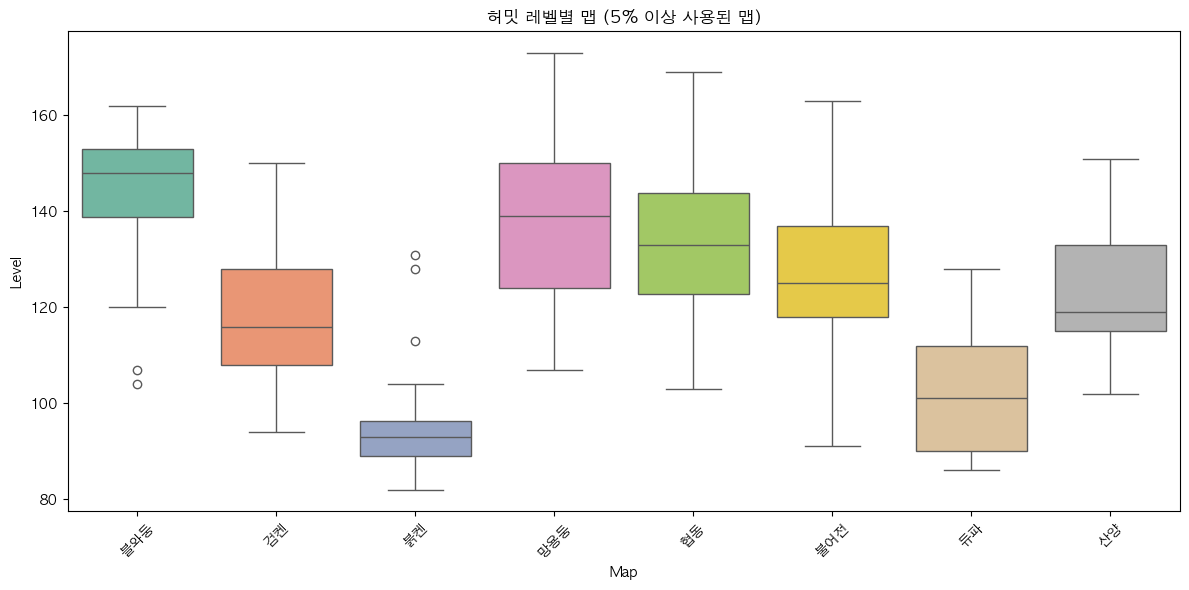

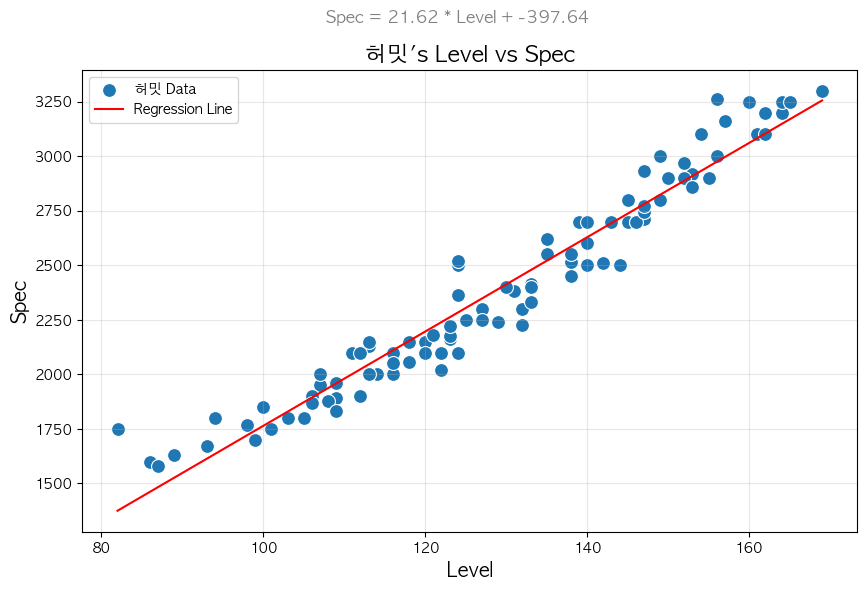

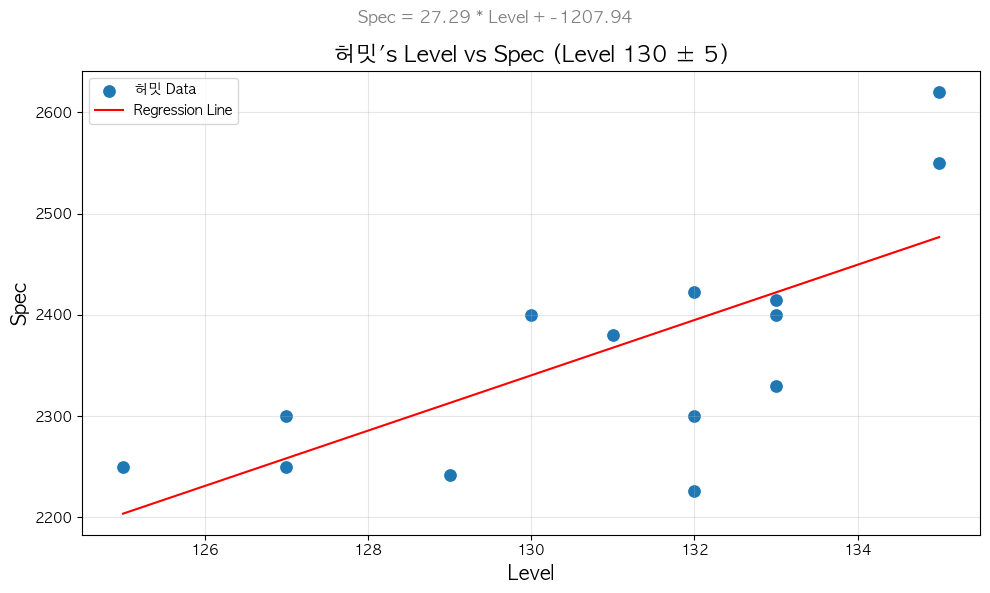

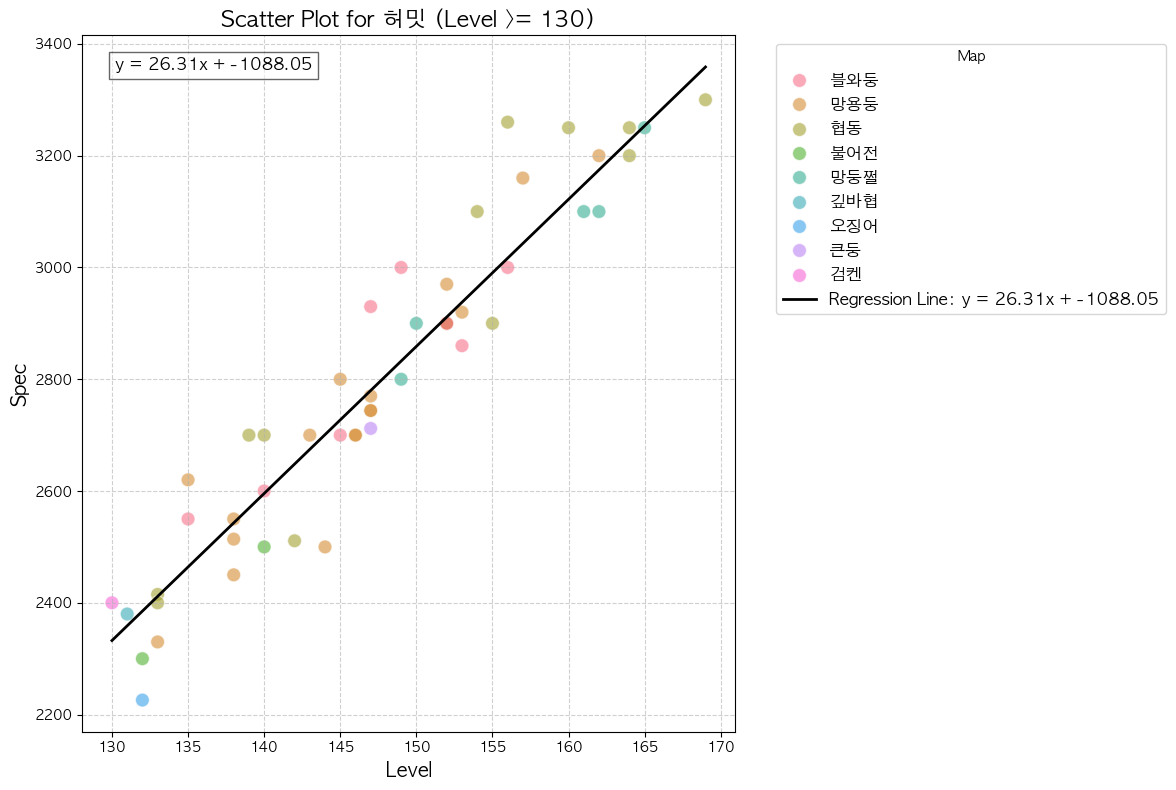

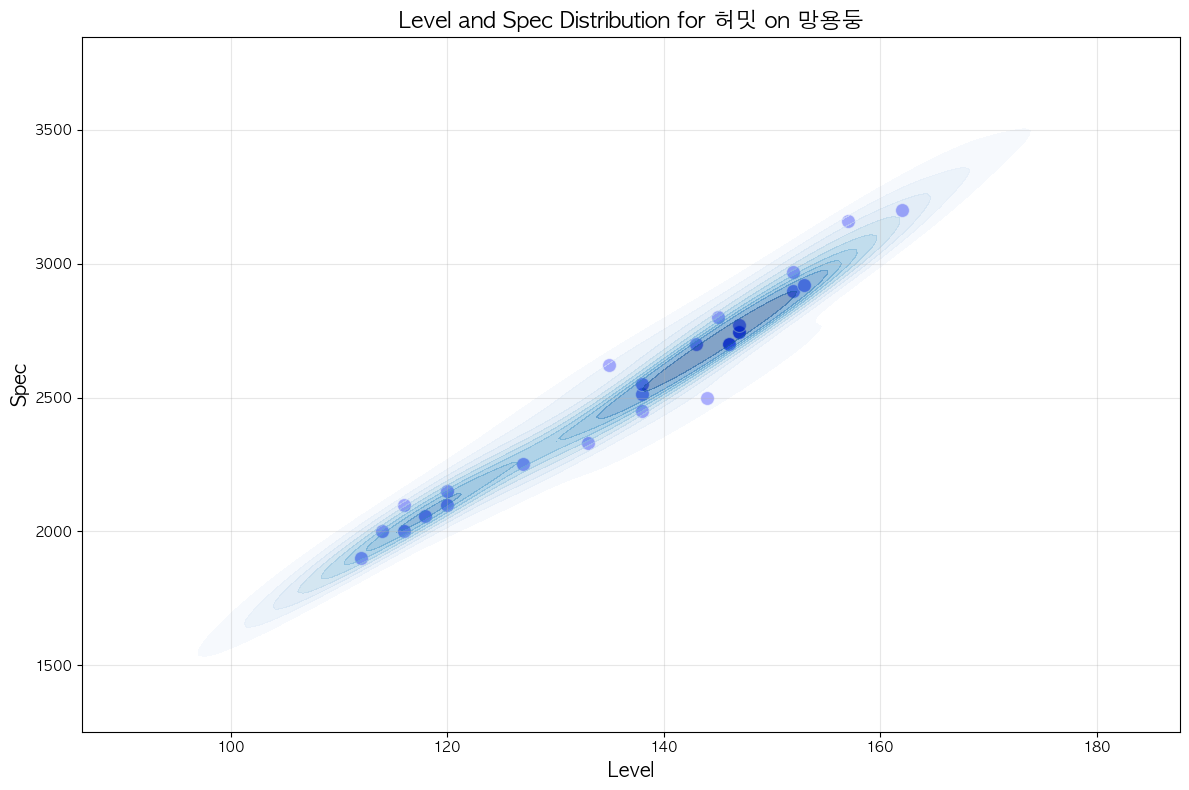

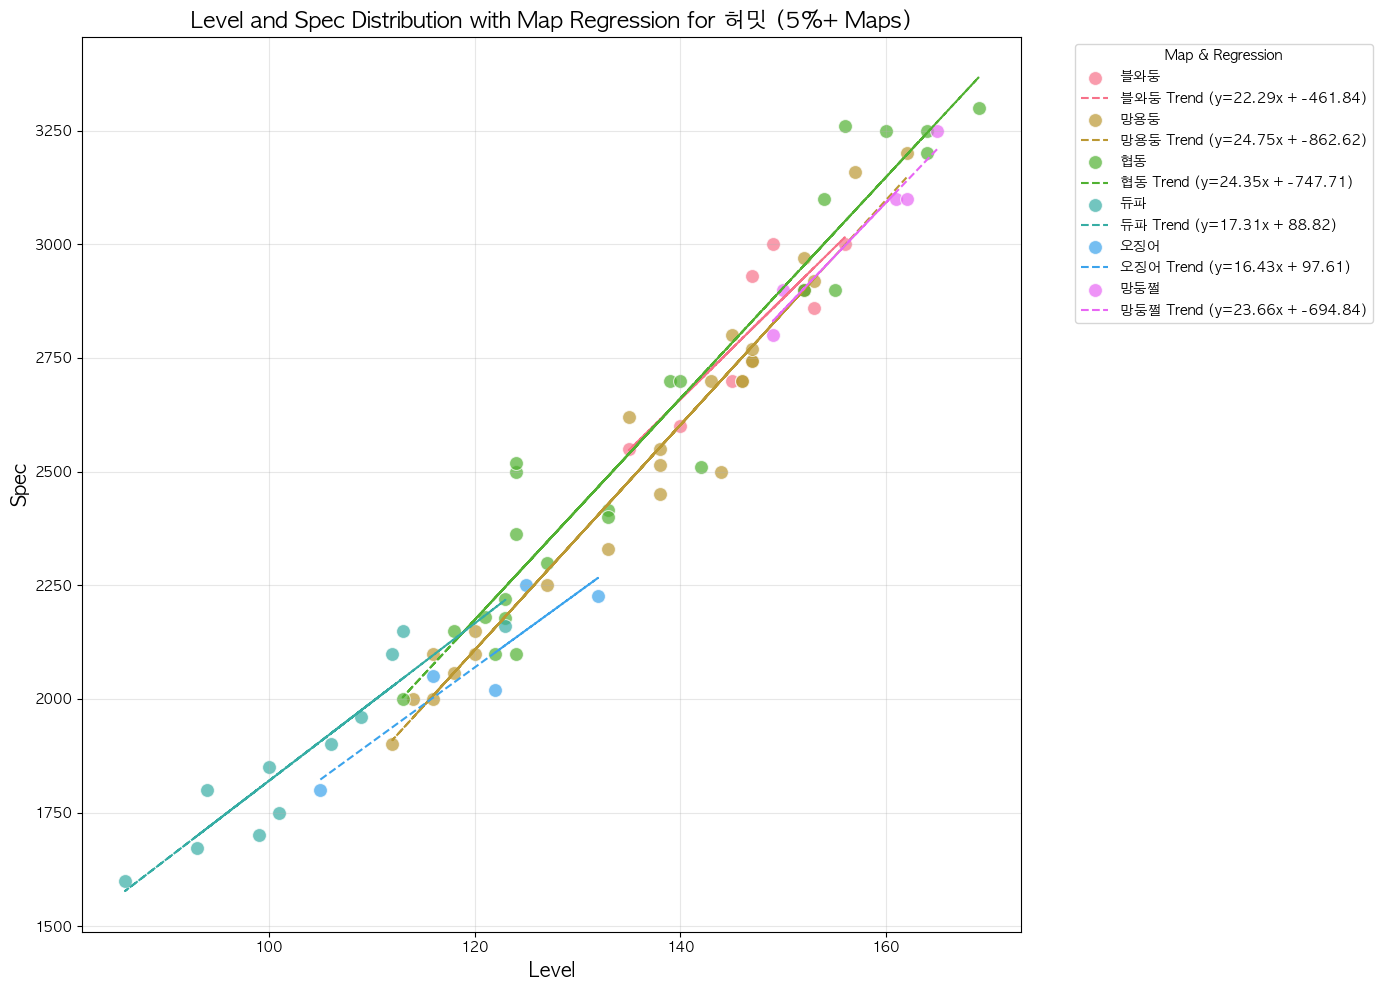

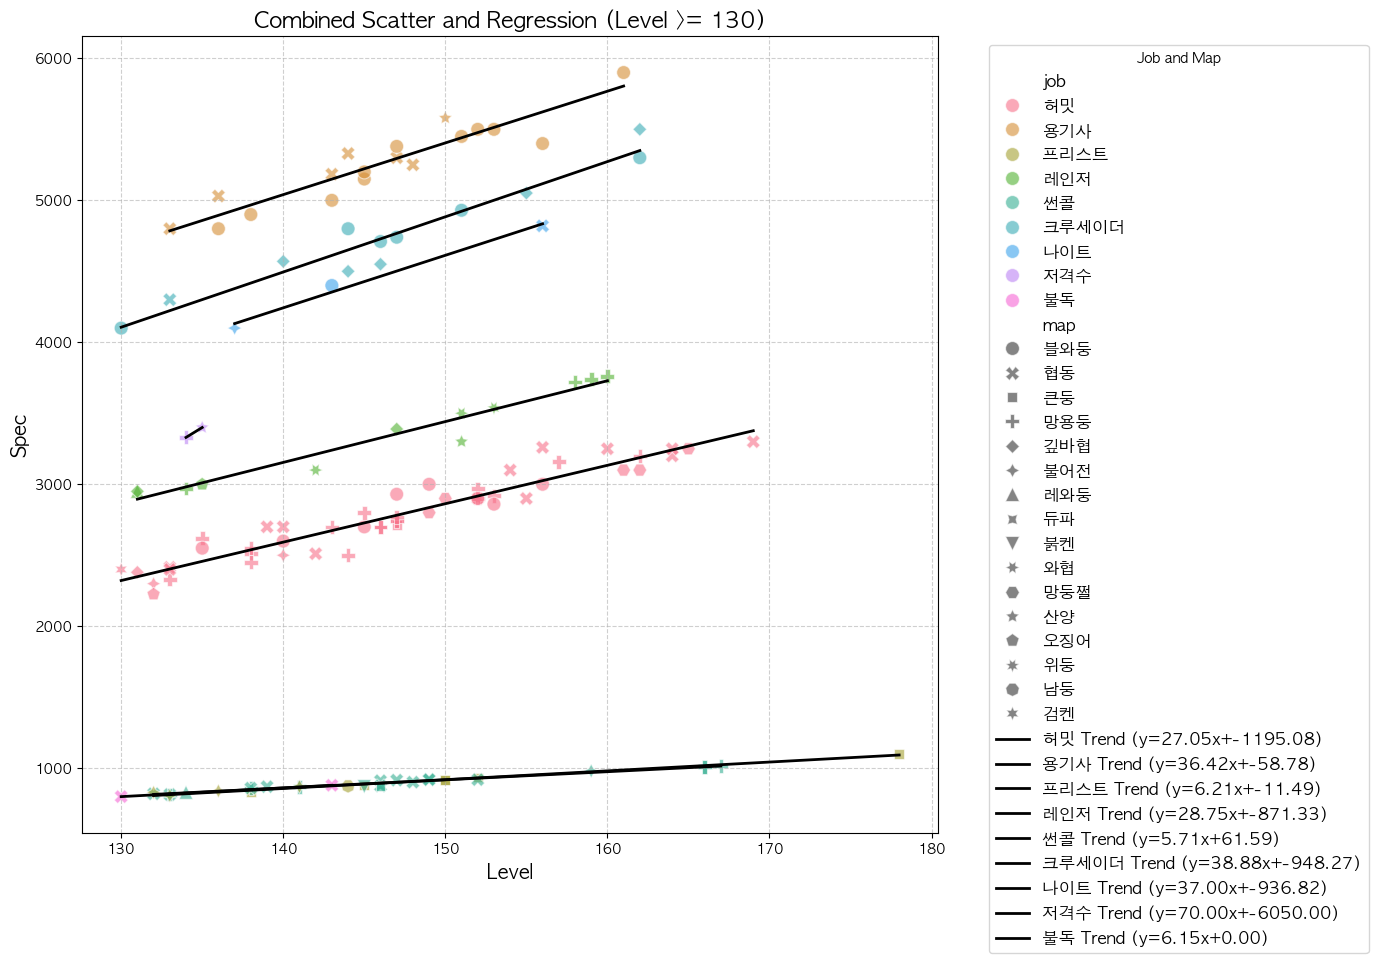

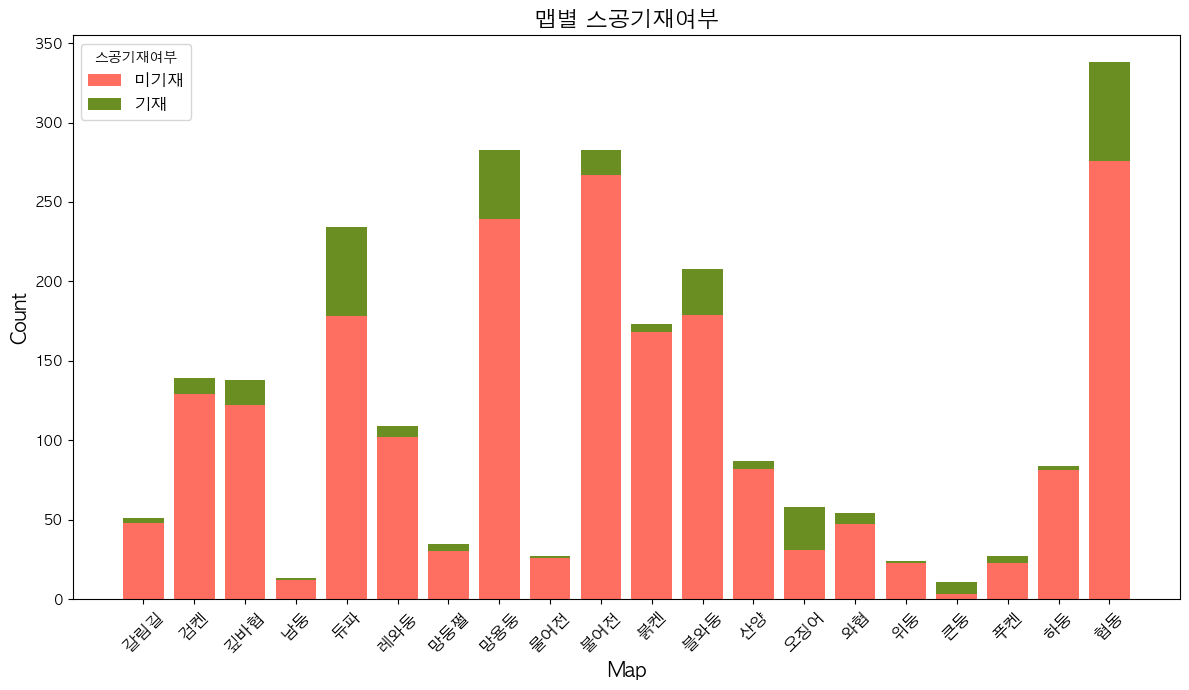

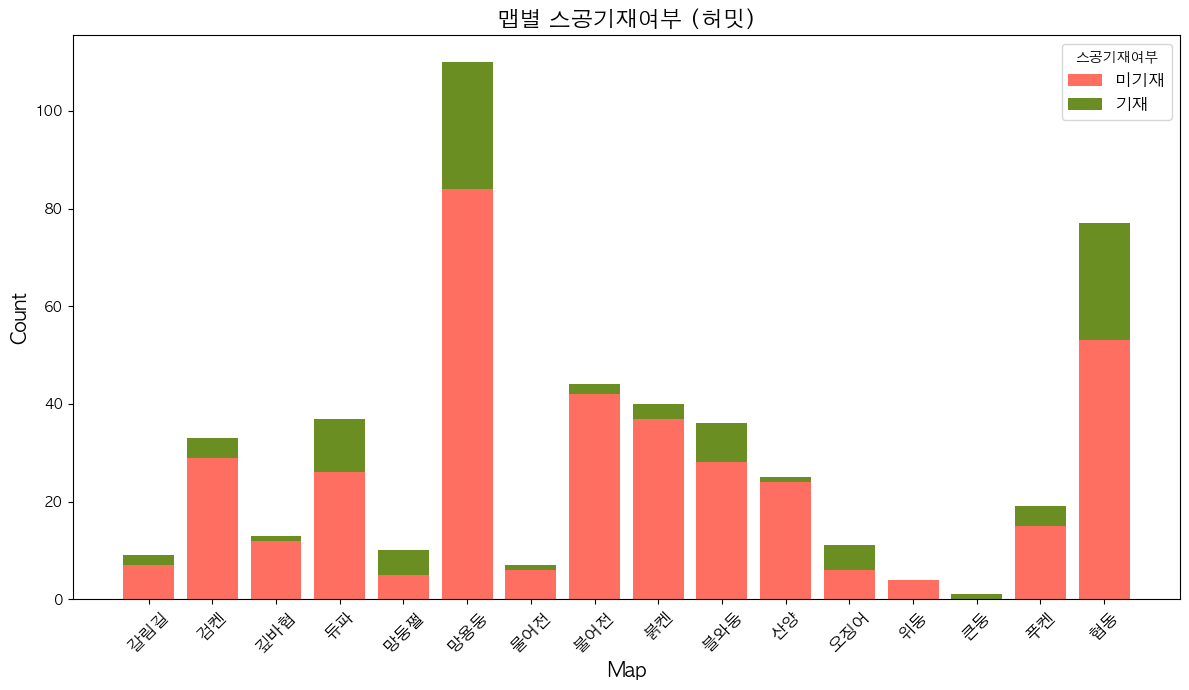

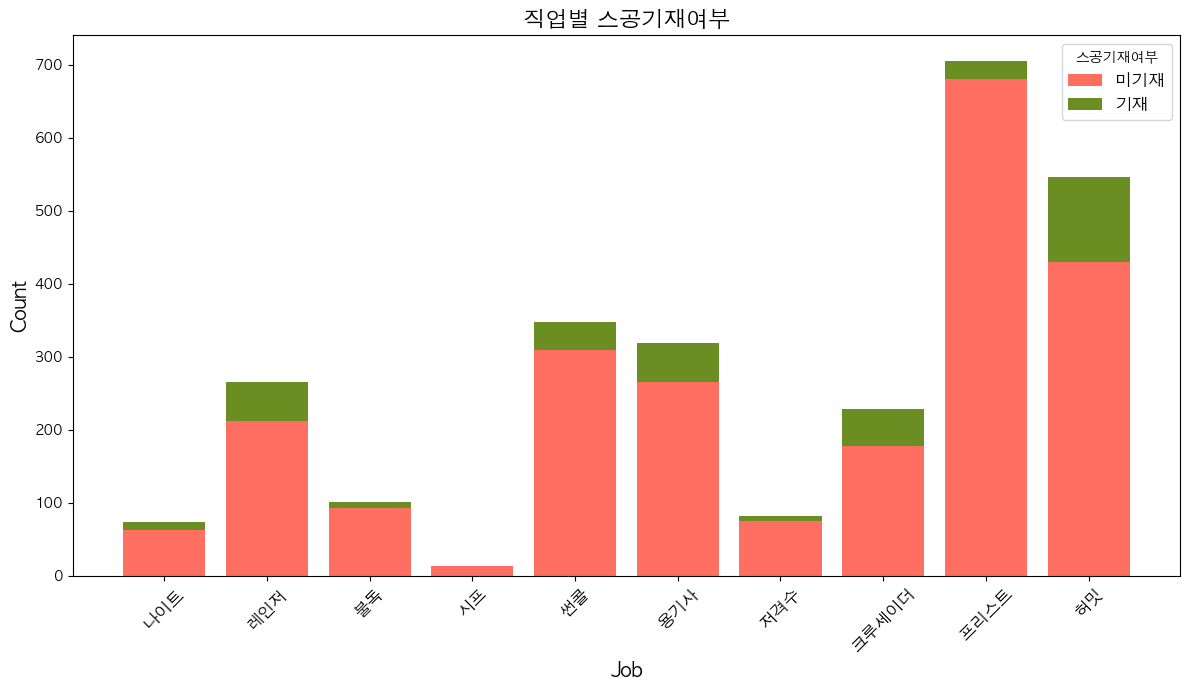

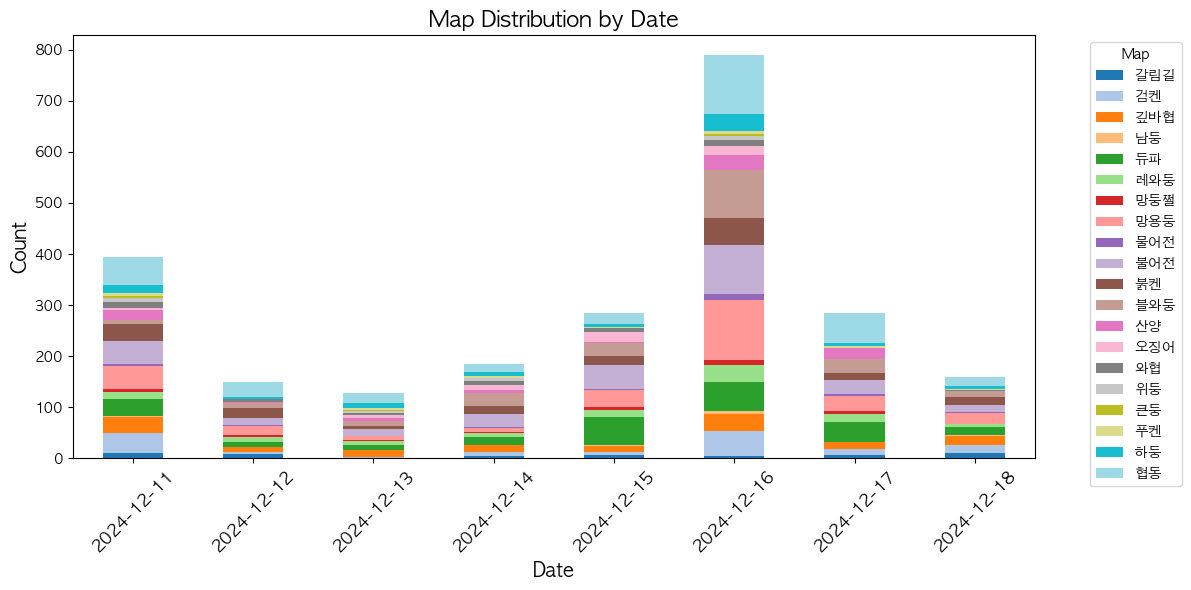

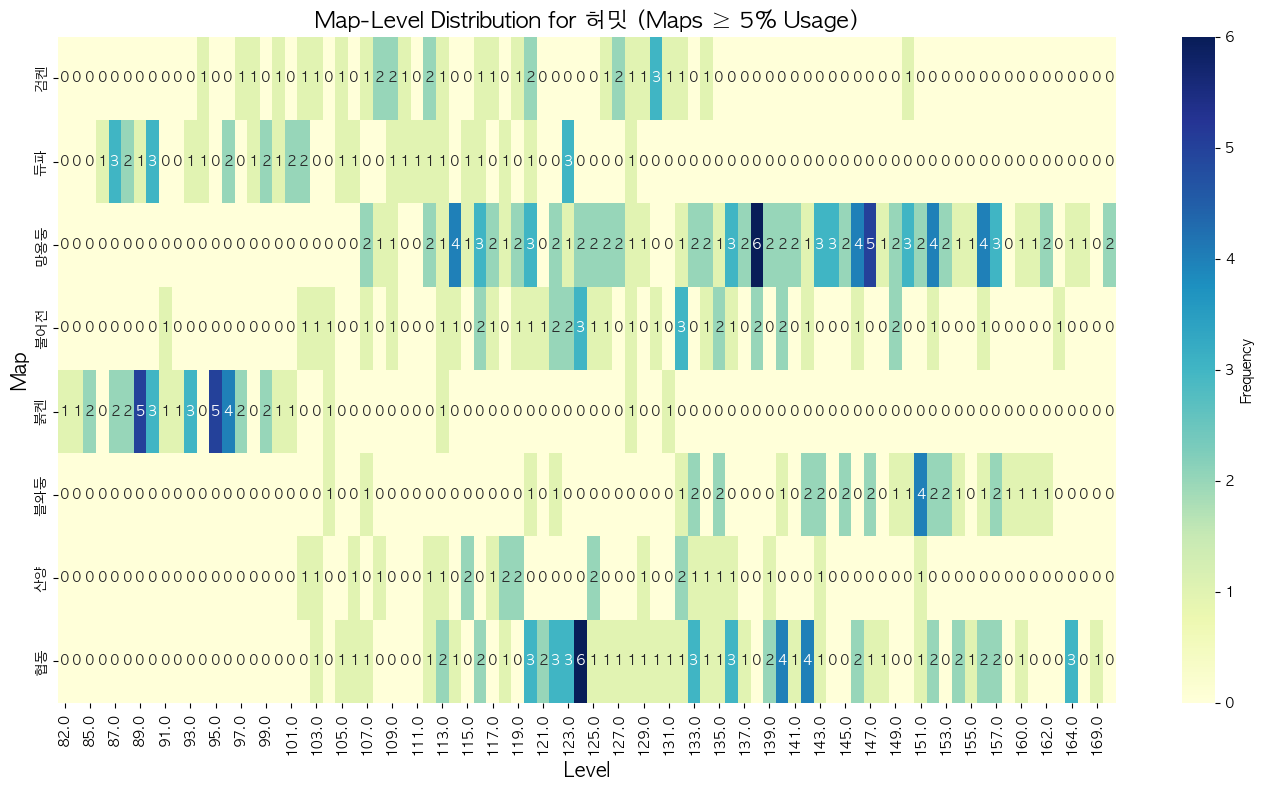

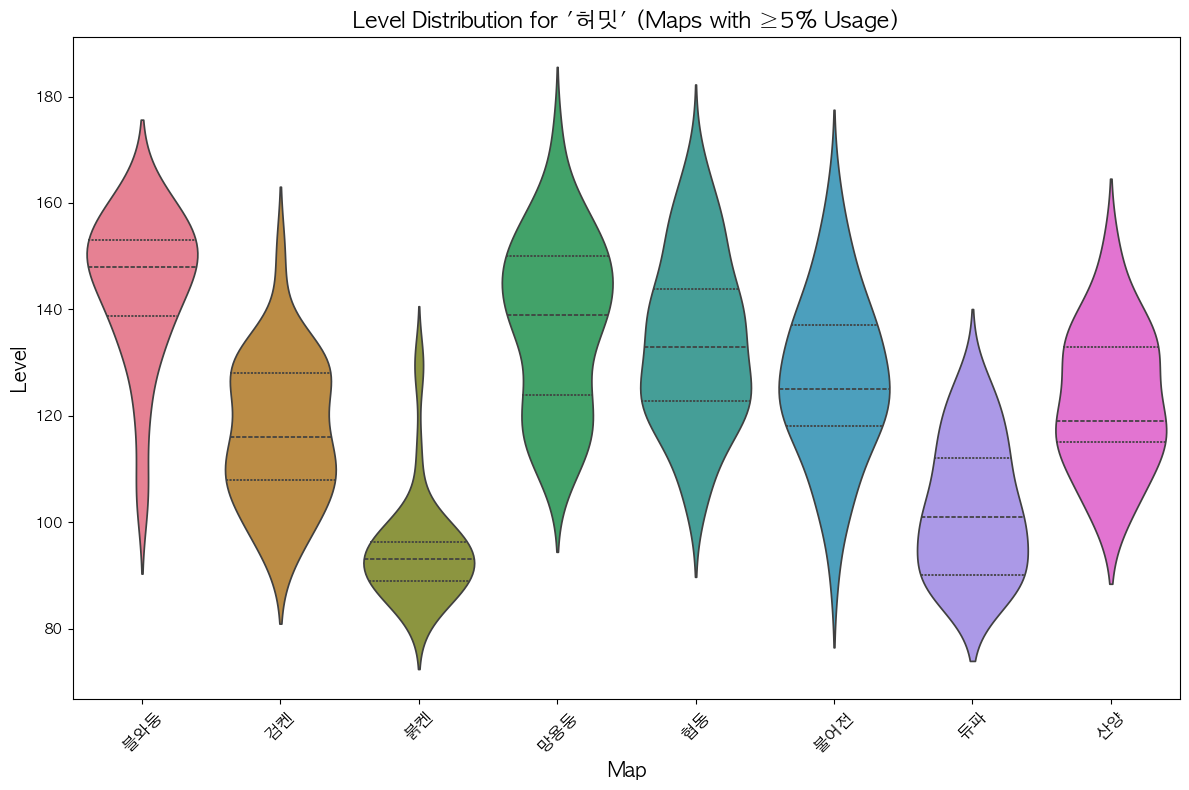

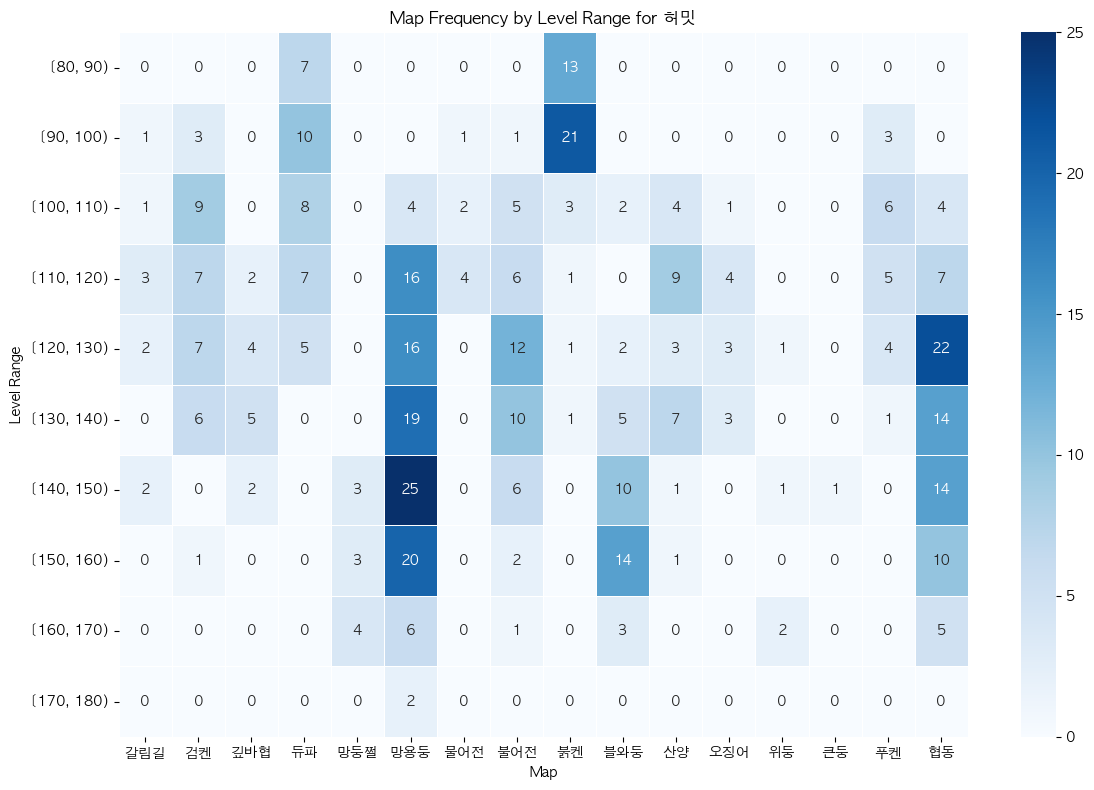

In [481]:
visualize_level_spec_comparison(processed_df, ['썬콜', '불독', '프리스트'])
visualize_map_percentage_change(df, "깊바협")

plot_level_by_map_by_job(df, "허밋")
plot_level_spec_with_regression(processed_df, "허밋")
plot_level_spec_with_regression_by_level(df, "허밋", 130)
plot_scatter_by_job(df, "허밋", 130)
plot_level_spec_distribution_of_job_and_map(df, "망용둥", "허밋")
plot_level_spec_distribution_of_job(df, "허밋")
plot_combined_scatter_with_regression_by_level(processed_df, 130)
visualize_spec_validity_by_map(df)
visualize_spec_validity_by_map(df, "허밋")
visualize_spec_validity_by_job(df)
visualize_map_distribution_by_date(df)
plot_map_level_heatmap_for_job(df, "허밋")
plot_level_distribution_by_job_and_map(df, "허밋")
plot_map_frequency_by_level_range(df, "허밋")

In [463]:
def print_high_level_data(df, threshold=150):
    high_level_data = df[df["level"] >= threshold]
    if high_level_data.empty:
        print(f"No data found where level is {threshold} or higher.")
    else:
        print(f"Data where level is {threshold} or higher:")
        print(high_level_data)

# Example usage
print_high_level_data(processed_df, threshold=160)

Data where level is 160 or higher:
     party_id      time  level    job  spec  map        date  valid  \
62         24   오후 1:13    164     허밋  3200   협동  2024-12-11   True   
68         75   오후 1:16    162  크루세이더  5500  깊바협  2024-12-11   True   
75        169   오후 1:34    164     허밋  3250   협동  2024-12-11   True   
76        181   오후 1:35    166     썬콜  1011  망용둥  2024-12-11   True   
78        285   오후 1:37    178   프리스트  1100   큰둥  2024-12-11   True   
95          8   오후 3:47    166     썬콜  1011  망용둥  2024-12-15   True   
96          9   오후 3:47    161     허밋  3100  망둥쩔  2024-12-15   True   
159        99   오후 2:53    161    용기사  5900  블와둥  2024-12-14   True   
182       142  오전 12:43    160     허밋  3250   협동  2024-12-16   True   
186       151  오전 12:44    169     허밋  3300   협동  2024-12-16   True   
196       200  오전 12:46    162     허밋  3100  망둥쩔  2024-12-16   True   
222       457   오전 1:19    160    레인저  3761  망용둥  2024-12-16   True   
265       962   오전 2:54    162  크루세이더  530

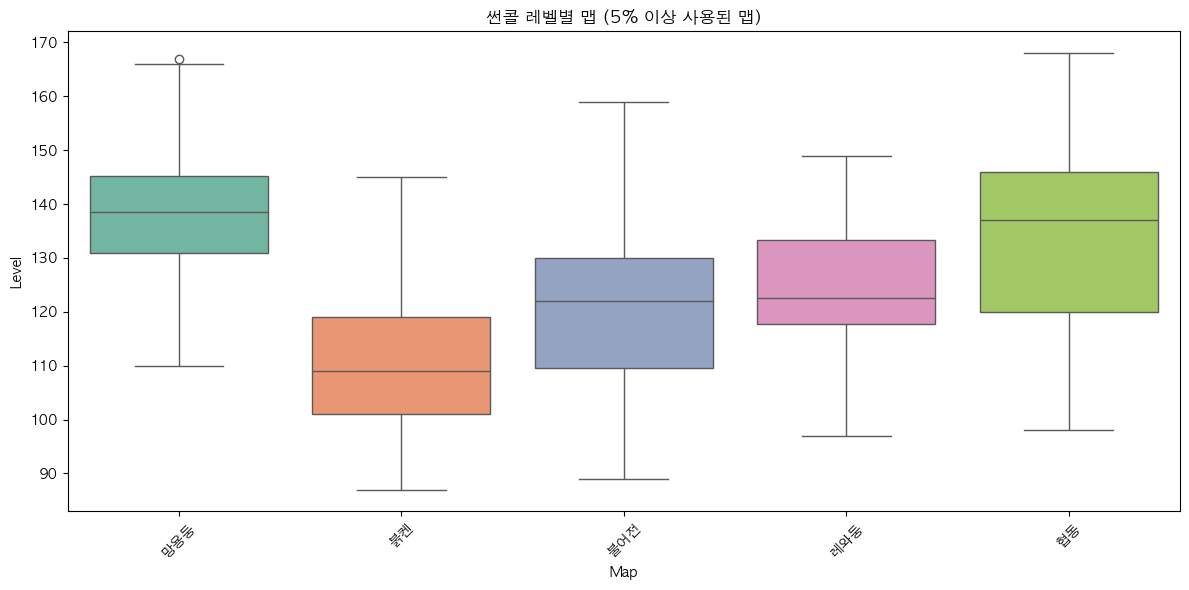

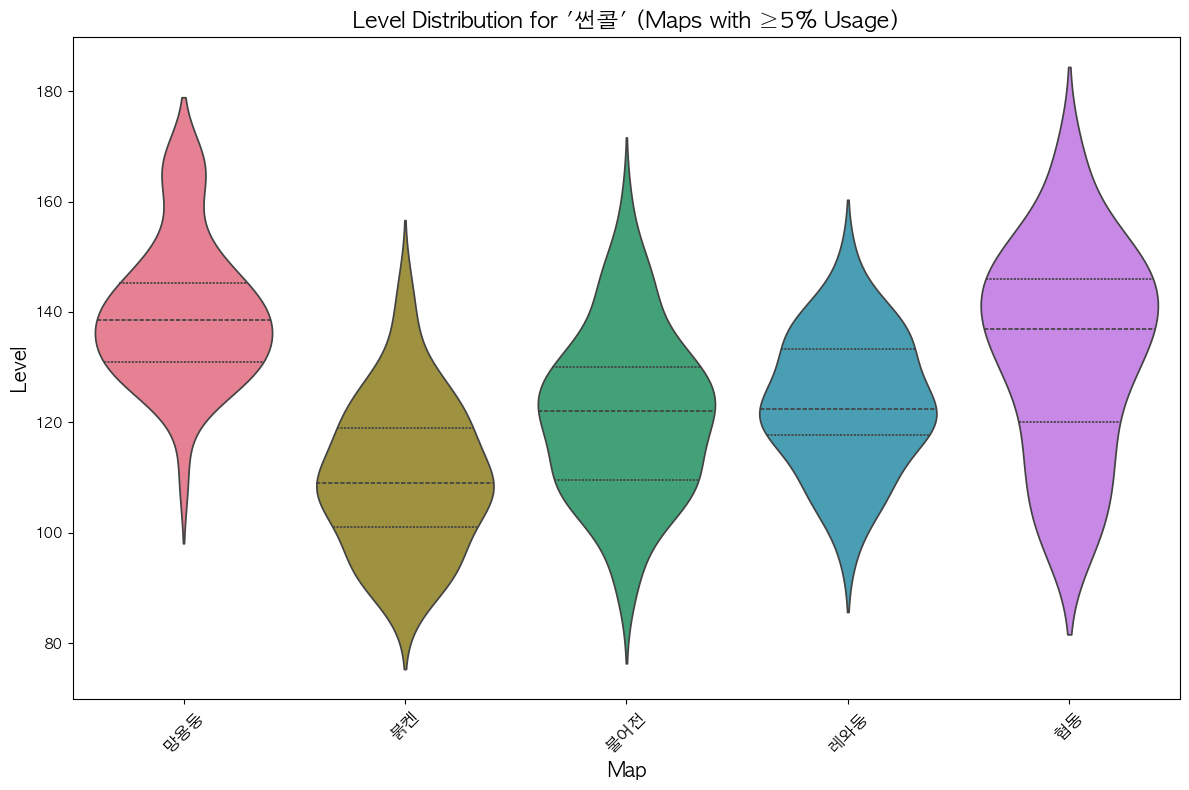

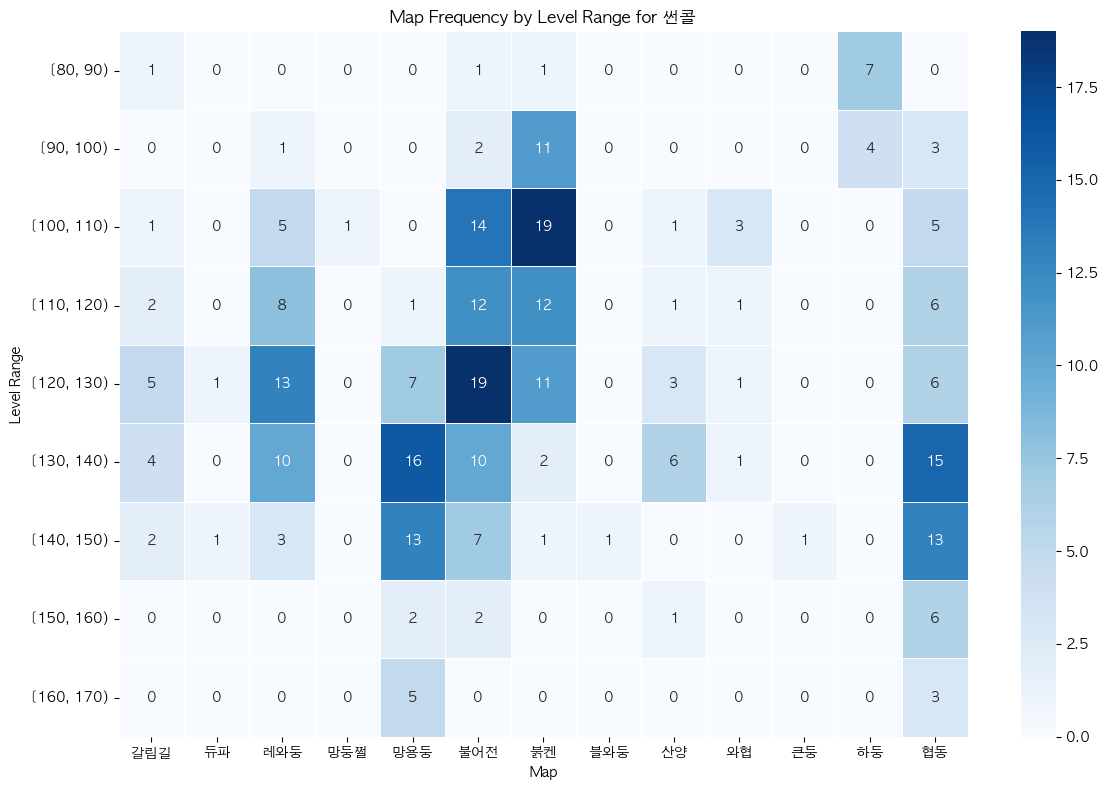

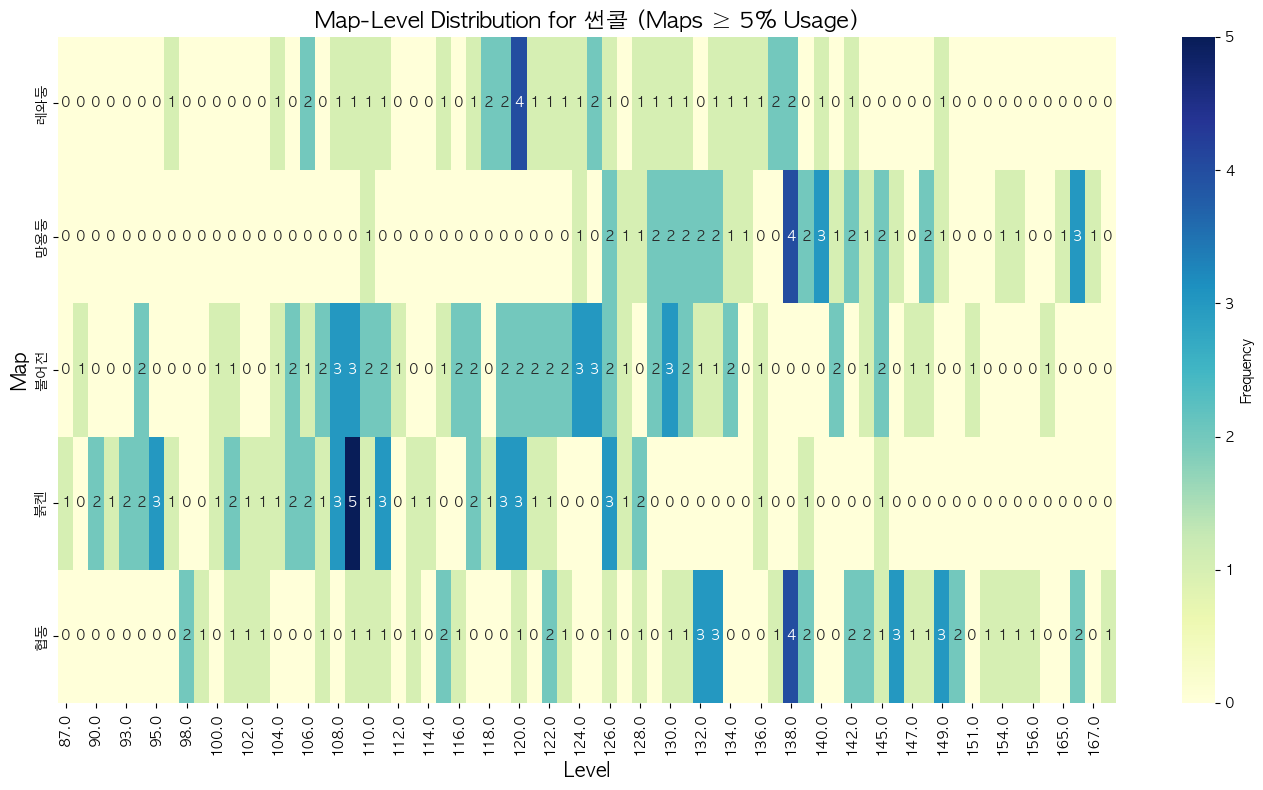

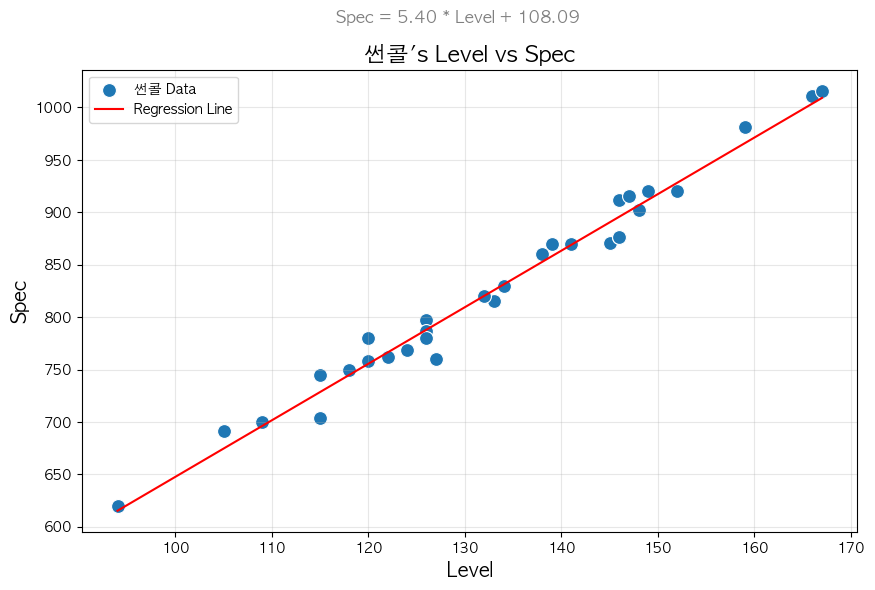

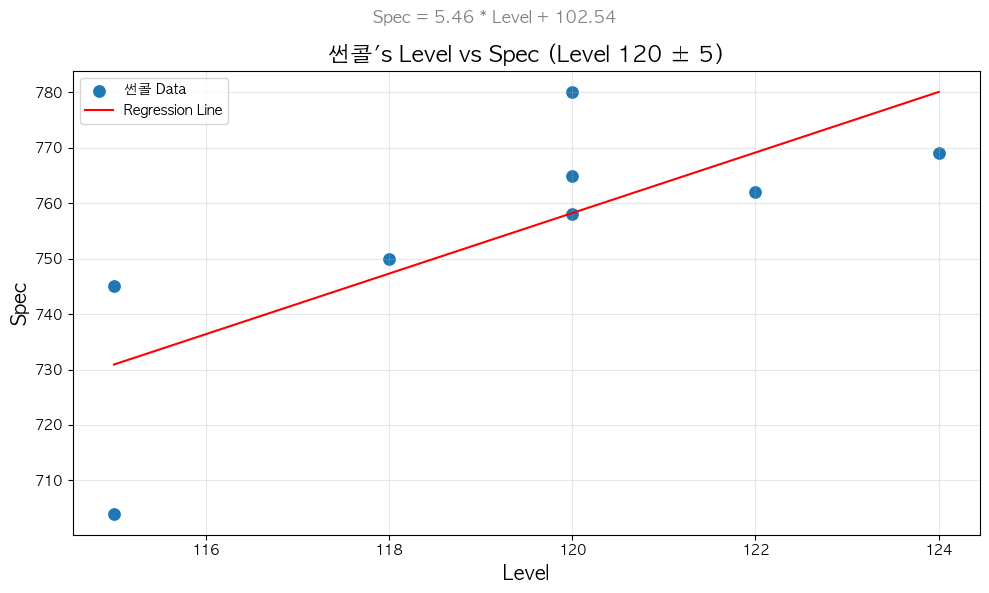

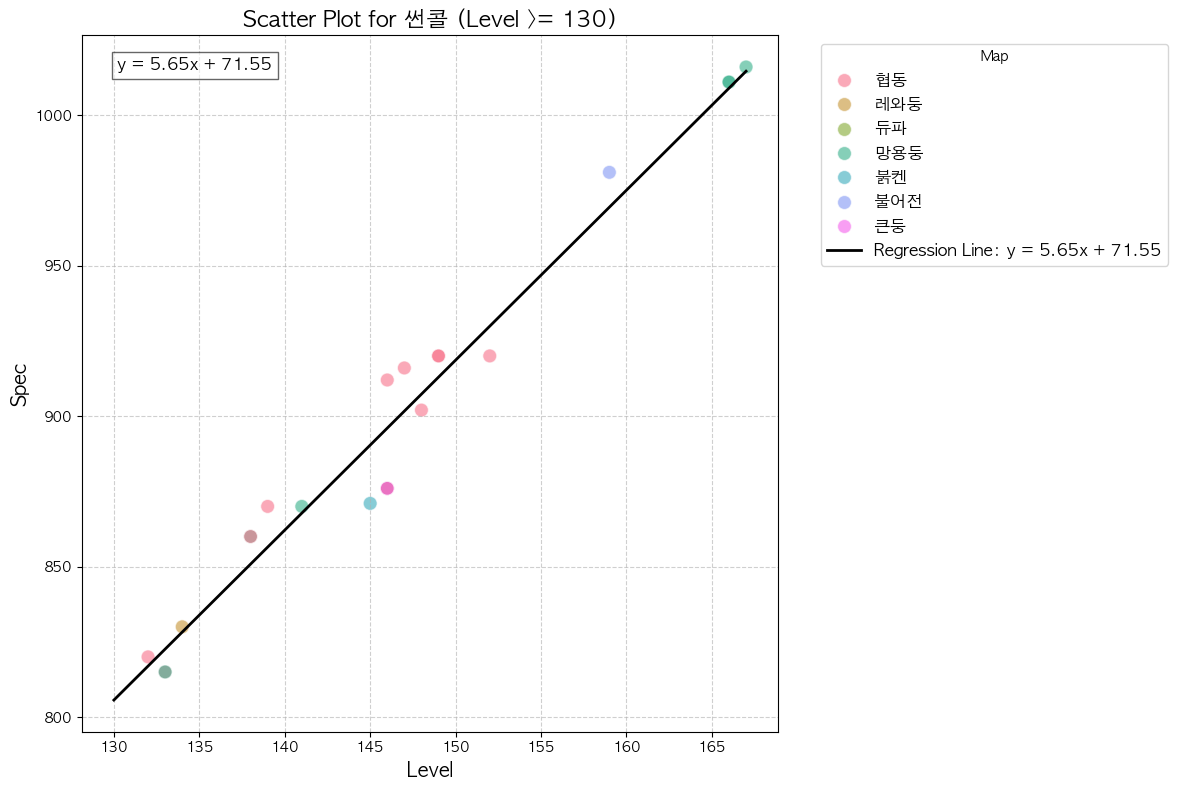

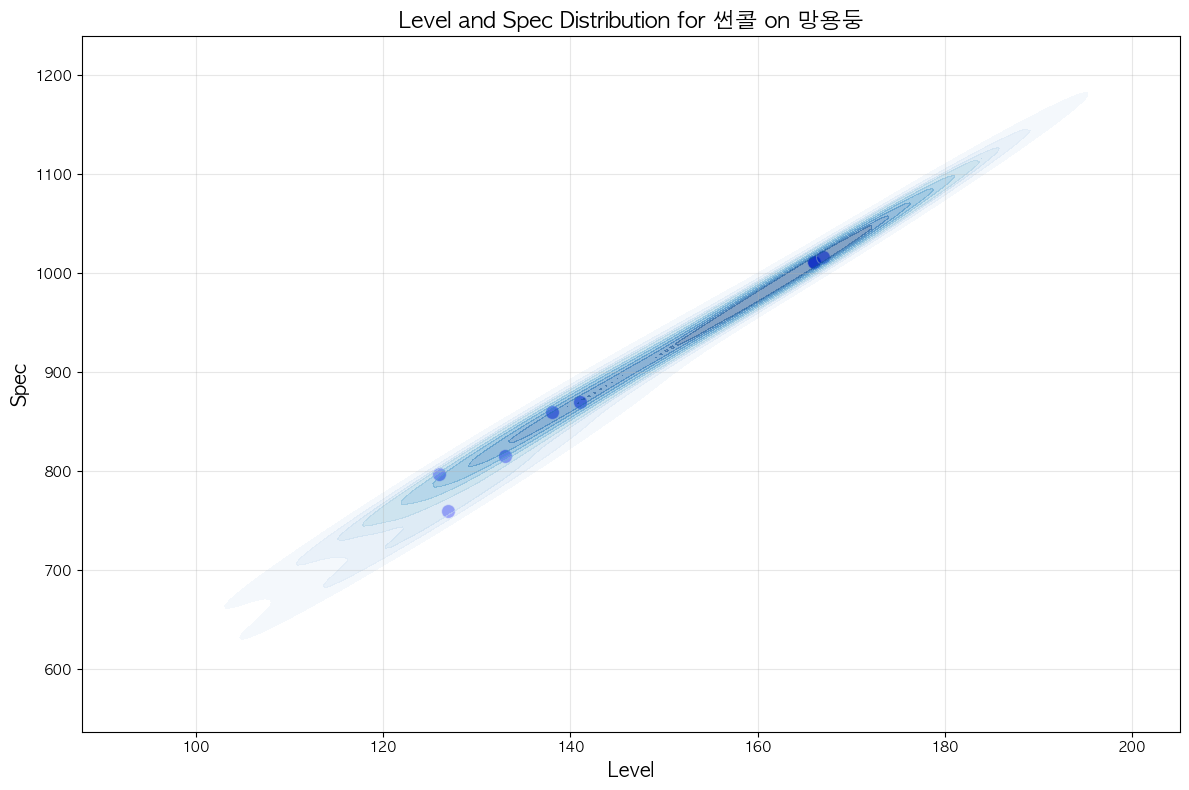

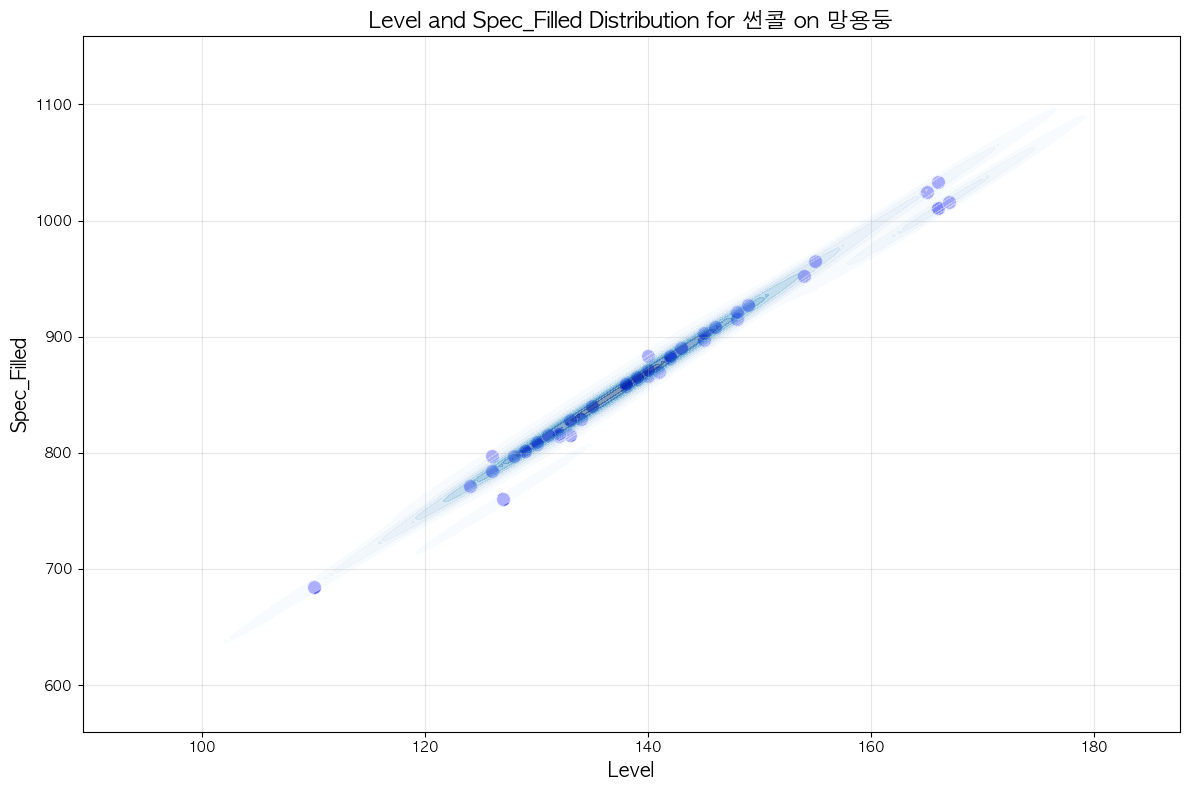

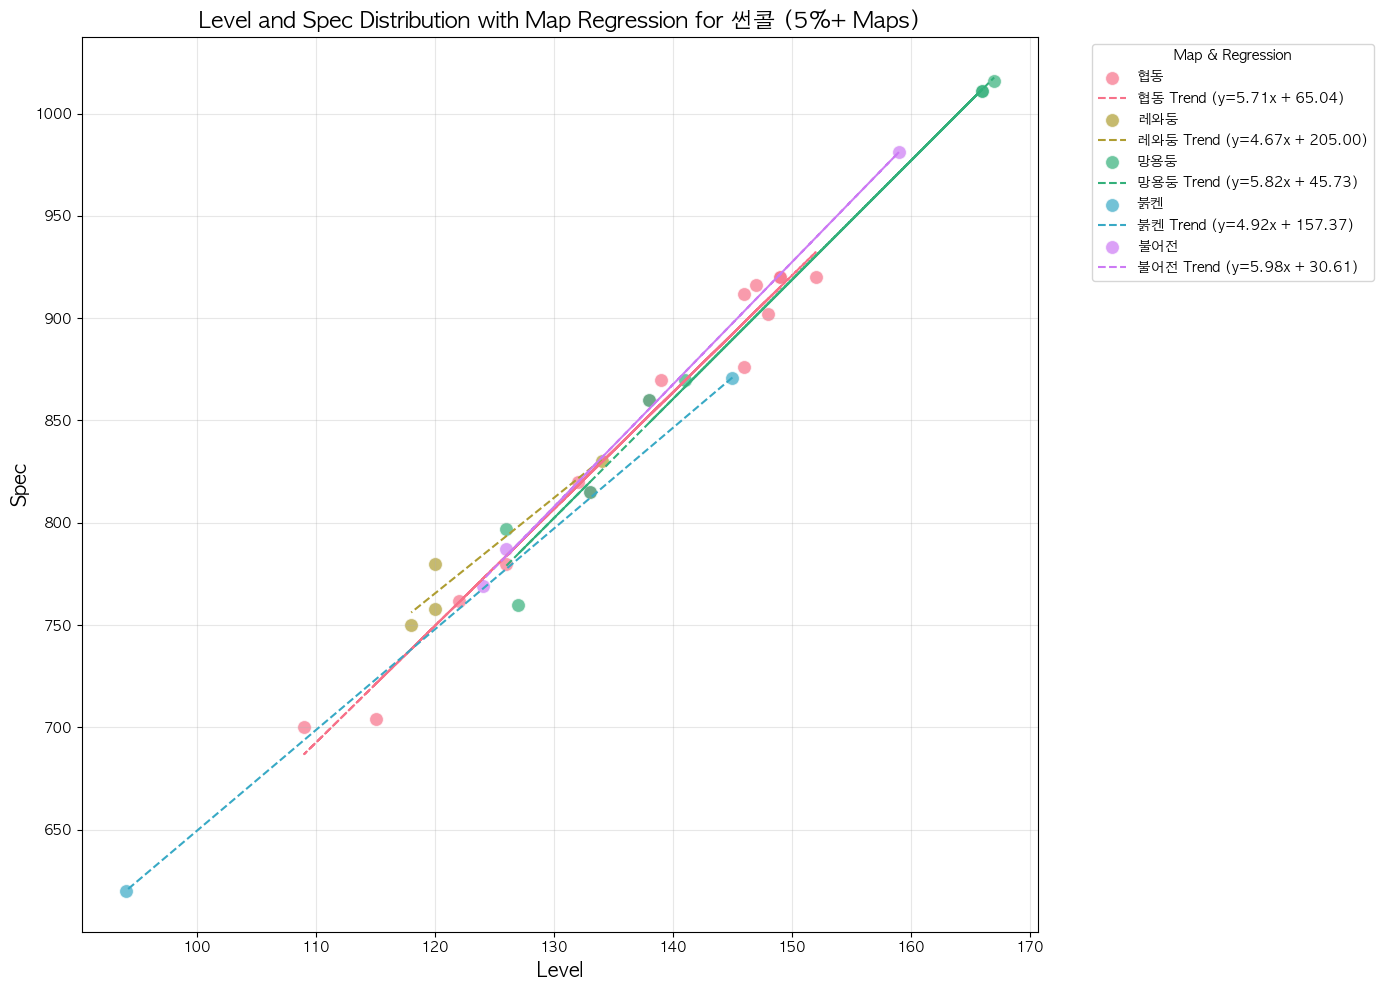

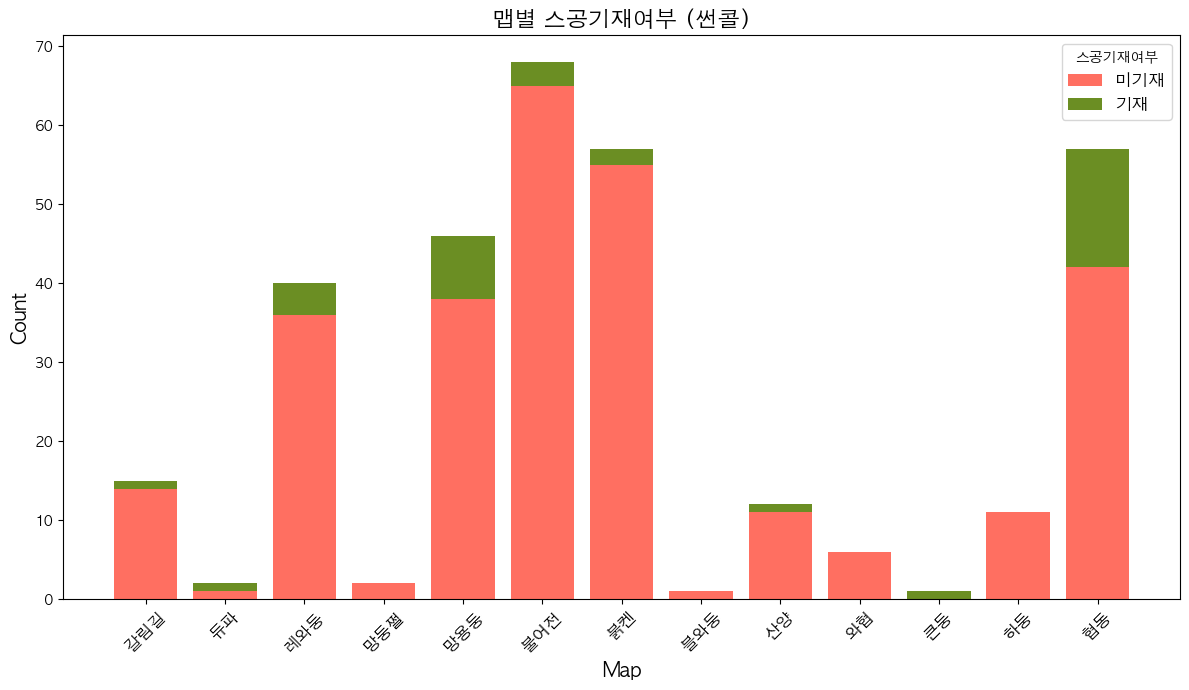

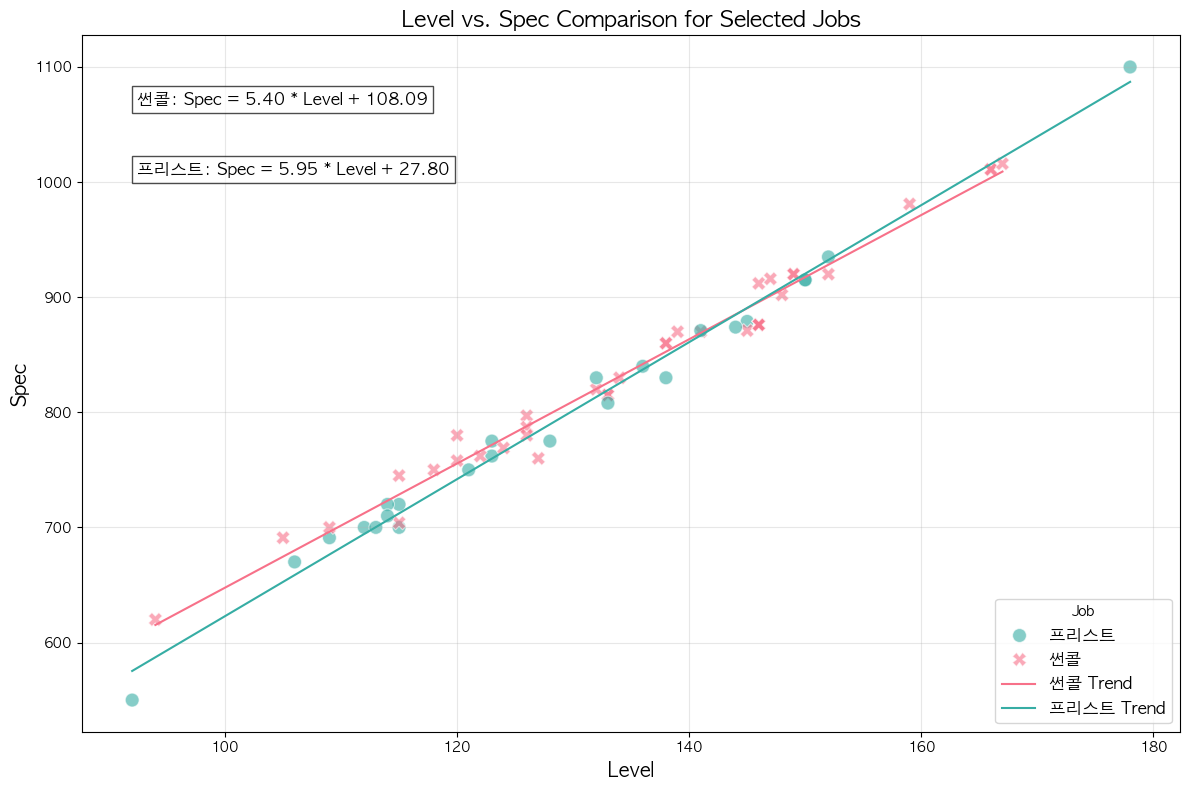

In [488]:
def plot_job(job):
    plot_level_by_map_by_job(df, job)
    plot_level_distribution_by_job_and_map(df, job)
    plot_map_frequency_by_level_range(df, job)
    plot_map_level_heatmap_for_job(df, job)
    
    plot_level_spec_with_regression(processed_df, job)
    # plot_level_spec_with_regression_by_level(df, job, 120)
    plot_scatter_by_job(df, job, 130)
    plot_level_spec_distribution_of_job_and_map(df, "망용둥", job)
    plot_level_spec_filled_distribution_of_job_and_map(df, "망용둥", job)
    plot_level_spec_distribution_of_job(df, job)
    visualize_spec_validity_by_map(df, job)

plot_job("썬콜")
visualize_level_spec_comparison(processed_df, ['썬콜', '프리스트'])

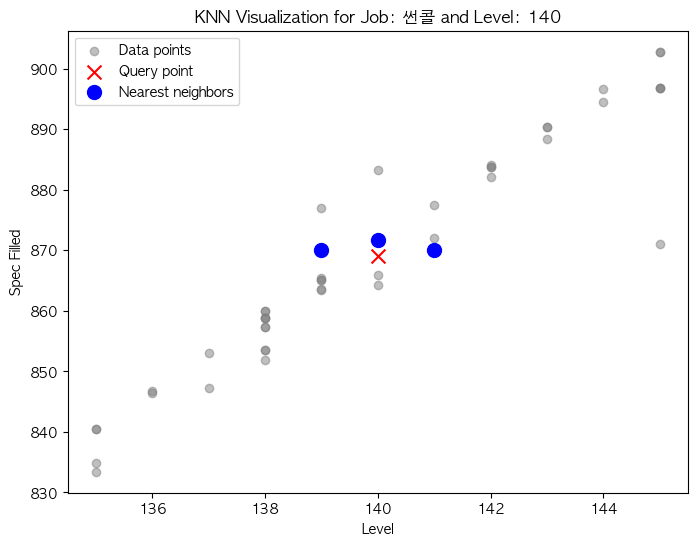

Recommended Maps and Scores: [('협동', np.float64(1.3327060402082762)), ('망용둥', np.float64(1.3327060402082762))]


In [635]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Function to get map recommendations based on a given level and job
def recommend_map(level, job, level_range=5):
    # Data Preprocessing: Remove rows with missing values in important columns
    df_cleaned = df.dropna(subset=['level', 'spec_filled', 'map'])
    
    # Filter the dataset to use only the data corresponding to the input job
    relevant_data = df_cleaned[(df_cleaned['level'] >= level - level_range) & 
                               (df_cleaned['level'] <= level + level_range) & 
                               (df_cleaned['job'] == job)]
    
    if relevant_data.empty:
        return "No data available for this job/level combination within the specified range."

    # Prepare feature matrix (X) for KNN model: 'level', 'spec_filled'
    X = relevant_data[['level', 'spec_filled']].values
    maps_relevant = relevant_data['map'].values

    # KNN Model for finding similar maps based on features
    knn_relevant = NearestNeighbors(n_neighbors=3, algorithm='auto', metric='euclidean')
    knn_relevant.fit(X)

    # Create a feature vector for the input (level, spec_filled)
    input_spec_filled = relevant_data['spec_filled'].mean()  # Use the mean spec_filled value for input
    input_vector = np.array([[level, input_spec_filled]])

    # Find the top 3 nearest neighbors (maps) based on the input features
    distances, indices = knn_relevant.kneighbors(input_vector)
    
    # Get the top 3 map recommendations and their corresponding distances
    recommended_maps = maps_relevant[indices.flatten()]
    recommendation_scores = distances.flatten()

    # Remove duplicate maps if any
    recommended_maps = list(dict.fromkeys(recommended_maps))[:3]  # Limit to 3 unique maps

    # Sort the recommendations by raw distance (lower distance is better)
    sorted_recommendations = sorted(zip(recommended_maps, recommendation_scores), key=lambda x: x[1])

    # Visualize the KNN results
    if isinstance(recommended_maps, list):
        maps = relevant_data['map'].values
        levels = relevant_data['level'].values
        spec_filled = relevant_data['spec_filled'].values
        
        # Plot all data points
        plt.figure(figsize=(8, 6))
        plt.scatter(levels, spec_filled, c='gray', label='Data points', alpha=0.5)

        # Highlight the query point
        plt.scatter(level, input_spec_filled, c='red', label='Query point', s=100, marker='x')

        # Highlight the nearest neighbors
        nearest_neighbors = X[indices.flatten()]
        plt.scatter(nearest_neighbors[:, 0], nearest_neighbors[:, 1], c='blue', label='Nearest neighbors', s=100, marker='o')

        # Labels and title
        plt.xlabel('Level')
        plt.ylabel('Spec Filled')
        plt.title(f"KNN Visualization for Job: {job} and Level: {level}")
        plt.legend()

        # Show plot
        plt.show()

    return sorted_recommendations

# Example usage
recommended_maps = recommend_map(140, "썬콜", level_range=5)

# Output the recommended maps and their scores (raw distance)
print("Recommended Maps and Scores:", recommended_maps)

Unique maps after preprocessing:
['망용둥' '협동' '붉켄' '레와둥' '불어전']
Similarity scores for recommended maps:
Map: 망용둥, Score: 0.3333333333333334
Map: 불어전, Score: 0.3333333333333333
Map: 레와둥, Score: 0.3333333333333333


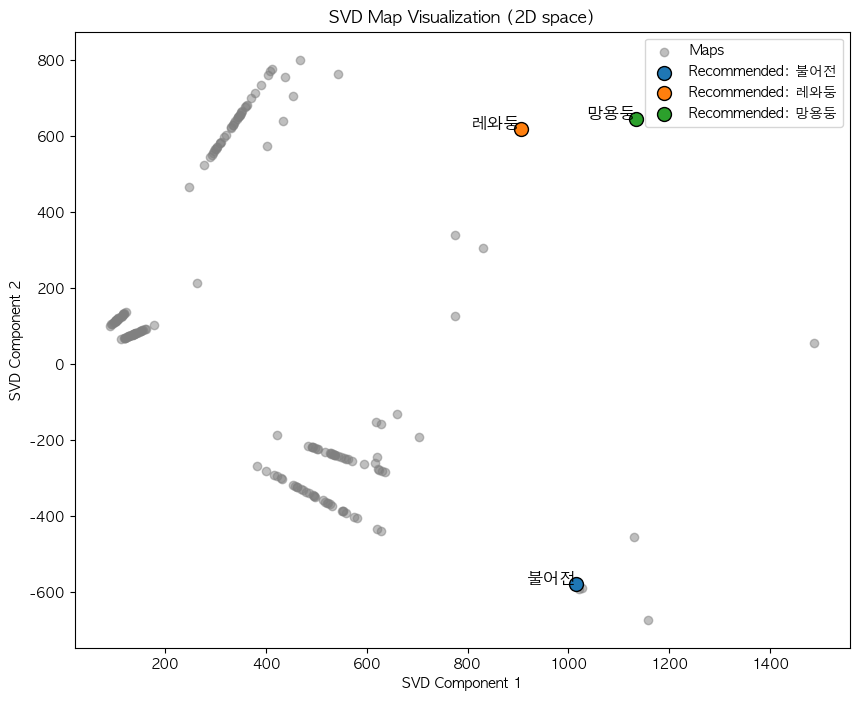

Recommended Maps: ['망용둥', '불어전', '레와둥']


In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Function to get map recommendations based on a given level and job
def recommend_map(level, job, level_range=5):

    # Filter out rows that do not belong to the specified job
    df_job_filtered = df[df['job'] == job]

    # Data Preprocessing: Remove rows with missing values in important columns
    df_cleaned = df_job_filtered.dropna(subset=['level', 'job', 'spec_filled', 'map'])
    
    # Calculate map usage frequency for each job
    map_usage_frequency = df_cleaned.groupby(['job', 'map']).size().reset_index(name='usage_count')
    
    # Calculate the total number of interactions for each job
    job_total_count = df_cleaned.groupby('job').size().reset_index(name='total_count')
    
    # Merge the usage count with the total count for each job
    map_usage_frequency = pd.merge(map_usage_frequency, job_total_count, on='job')
    
    # Calculate the percentage usage for each map within each job
    map_usage_frequency['usage_percentage'] = (map_usage_frequency['usage_count'] / map_usage_frequency['total_count']) * 100
    
    # Filter out maps used in less than 5% of the total interactions for each job
    valid_maps_per_job = map_usage_frequency[map_usage_frequency['usage_percentage'] >= 5]
    
    # Now filter the original dataframe to only keep rows with maps that meet the usage threshold
    df_cleaned_filtered = df_cleaned[df_cleaned['map'].isin(valid_maps_per_job['map'])]
    
    # Print the unique maps after preprocessing
    print("Unique maps after preprocessing:")
    print(df_cleaned_filtered['map'].unique())
    
    # Prepare the data for the recommendation system
    # Create a user-item interaction matrix where rows = users (party_id), columns = maps
    user_map_matrix = df_cleaned_filtered.pivot_table(index='party_id', columns='map', values='spec_filled', aggfunc='mean').fillna(0)
    
    # Apply Matrix Factorization using TruncatedSVD
    svd = TruncatedSVD(n_components=3, random_state=42)  # Using 3 latent factors for this example
    matrix_factorized = svd.fit_transform(user_map_matrix)
    
    # Get the cosine similarity between maps in the reduced space
    map_similarity = cosine_similarity(matrix_factorized.T)

    # Filter data based on the given level and job
    level_range_min = level - level_range
    level_range_max = level + level_range
    relevant_data = df_cleaned_filtered[(df_cleaned_filtered['level'] >= level_range_min) & 
                                       (df_cleaned_filtered['level'] <= level_range_max) & 
                                       (df_cleaned_filtered['job'] == job)]
    
    if relevant_data.empty:
        return "No data available for this job/level combination within the specified range."

    # Get the list of maps from the filtered data
    maps_relevant = relevant_data['map'].unique()

    # Ensure that the maps are present in the user_map_matrix
    valid_maps = [map_name for map_name in maps_relevant if map_name in user_map_matrix.columns]
    
    if not valid_maps:
        return "No valid maps available for recommendation."

    # Get the index of relevant maps in the reduced matrix (svd.transform)
    map_indices = [user_map_matrix.columns.get_loc(map_name) for map_name in valid_maps]
    
    # Ensure map_indices do not exceed the range of the reduced matrix (which has 3 factors)
    map_indices = [index for index in map_indices if index < len(map_similarity)]

    # Now calculate similarity scores for each relevant map with all other maps in the reduced matrix
    scores = np.mean(map_similarity[map_indices], axis=0)

    # Sort the scores and get top 3 recommended maps
    recommended_indices = np.argsort(scores)[::-1][:3]
    recommended_maps = user_map_matrix.columns[recommended_indices]
    
    # Print the similarity scores
    print("Similarity scores for recommended maps:")
    for map_name, score in zip(recommended_maps, scores[recommended_indices]):
        print(f"Map: {map_name}, Score: {score}")
    
    # Visualization of the SVD components and map recommendations
    # Visualize the maps in the SVD space (2D for simplicity)
    plt.figure(figsize=(10, 8))
    
    # Plot all maps in the reduced space (SVD components)
    plt.scatter(matrix_factorized[:, 0], matrix_factorized[:, 1], label="Maps", alpha=0.5, c='gray')
    
    # Highlight the recommended maps in a different color
    for idx in recommended_indices:
        plt.scatter(matrix_factorized[idx, 0], matrix_factorized[idx, 1], label=f"Recommended: {recommended_maps[idx]}", s=100, edgecolors='black')
    
    # Add labels for the recommended maps
    for idx in recommended_indices:
        plt.annotate(recommended_maps[idx], (matrix_factorized[idx, 0], matrix_factorized[idx, 1]), fontsize=12, ha='right', color='black')

    # Labeling and formatting the plot
    plt.title("SVD Map Visualization (2D space)")
    plt.xlabel("SVD Component 1")
    plt.ylabel("SVD Component 2")
    plt.legend()
    plt.show()

    # Return the top 3 recommended maps
    return recommended_maps.tolist()

# Example usage
recommended_maps = recommend_map(140, "썬콜", level_range=5)

# Output the recommended maps
print("Recommended Maps:", recommended_maps)

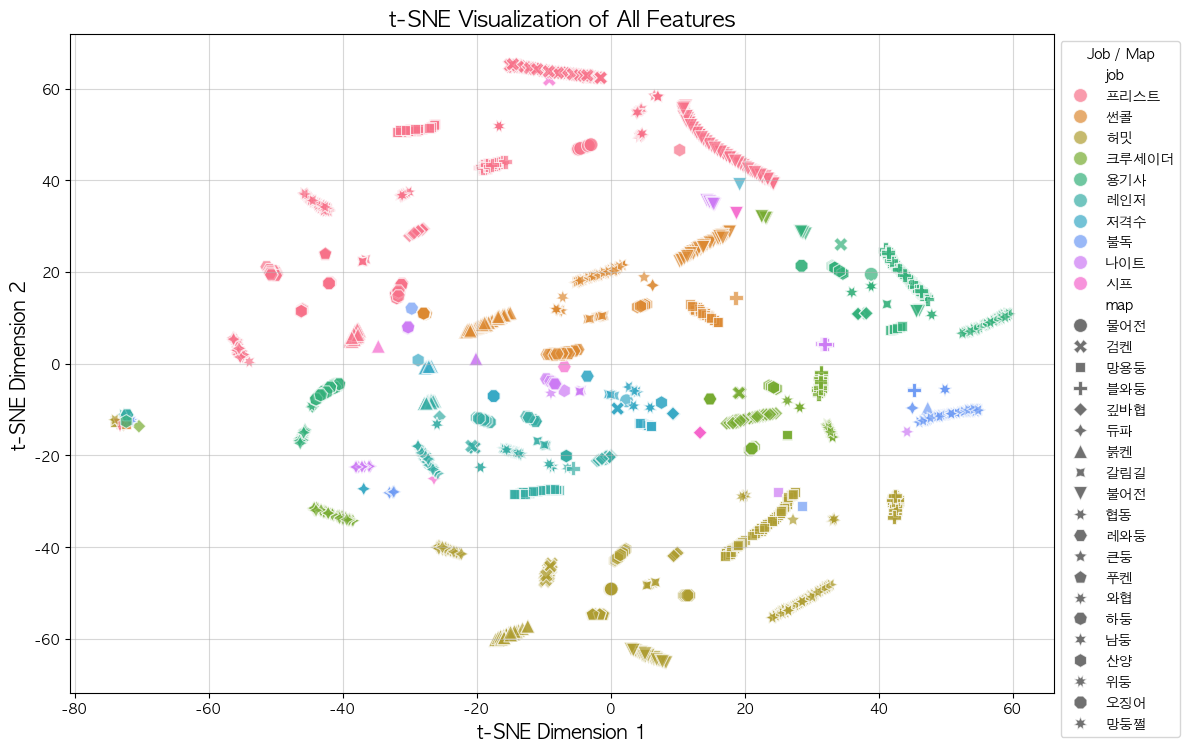

In [519]:
#차원축소 시각화
def preprocess_data(df):
    """
    Preprocesses the data for t-SNE:
    - Encodes categorical features (e.g., job, map).
    - Fills missing values.
    - Normalizes numerical features.
    """
    # One-Hot Encode categorical features
    categorical_features = ["job", "map"]
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")  # Corrected parameter
    encoded_cats = encoder.fit_transform(df[categorical_features])
    encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

    # Normalize numerical features
    numerical_features = ["level"]
    df[numerical_features] = df[numerical_features].fillna(0)  # Fill NaNs
    scaler = StandardScaler()
    normalized_nums = scaler.fit_transform(df[numerical_features])
    normalized_df = pd.DataFrame(normalized_nums, columns=numerical_features)

    # Combine all features
    combined_df = pd.concat([normalized_df, encoded_df], axis=1)
    return combined_df

def tsne_visualization(df, perplexity=30, learning_rate=200, n_iter=1000):
    """
    Applies t-SNE to the dataset and visualizes the results.
    """
    # Preprocess the data
    processed_data = preprocess_data(df)

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
    tsne_results = tsne.fit_transform(processed_data)

    # Add t-SNE results to the original DataFrame
    df["tsne_dim1"] = tsne_results[:, 0]
    df["tsne_dim2"] = tsne_results[:, 1]

    # Plot the t-SNE visualization
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=df, x="tsne_dim1", y="tsne_dim2", hue="job", style="map",
        palette="husl", s=100, alpha=0.7, edgecolor="w"
    )
    scatter.legend(loc="best", bbox_to_anchor=(1, 1), title="Job / Map")
    plt.title("t-SNE Visualization of All Features", fontsize=16)
    plt.xlabel("t-SNE Dimension 1", fontsize=14)
    plt.ylabel("t-SNE Dimension 2", fontsize=14)
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming df_combined_raw is the combined DataFrame
tsne_visualization(df)


In [466]:
#by Willkie